# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('acoustic_features.csv')

In [6]:
print(df.info())
print("\nClass distribution:")
print(df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [7]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
count       400.000000       400.000000         400.000000   400.000000   
mean          0.134650         0.553605           7.145932   123.682020   
std           0.064368         0.050750           2.280145    34.234344   
min           0.010000         0.302000           3.580000    48.284000   
25%           0.085000         0.523000           5.859500   101.490250   
50%           0.128000         0.553000           6.734000   120.132500   
75%           0.174000         0.583250           7.823500   148.986250   
max           0.431000         0.703000          23.475000   195.026000   

       _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
count    400.000000    400.000000    400.000000    400.000000    400.000000   
mean       2.456422      0.071890      0.488065      0.030465      0.178897   
std        0.799262      0.537865      0.294607      0.275839     

In [8]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                

In [9]:
corr_matrix = df.drop('Class', axis=1).corr()

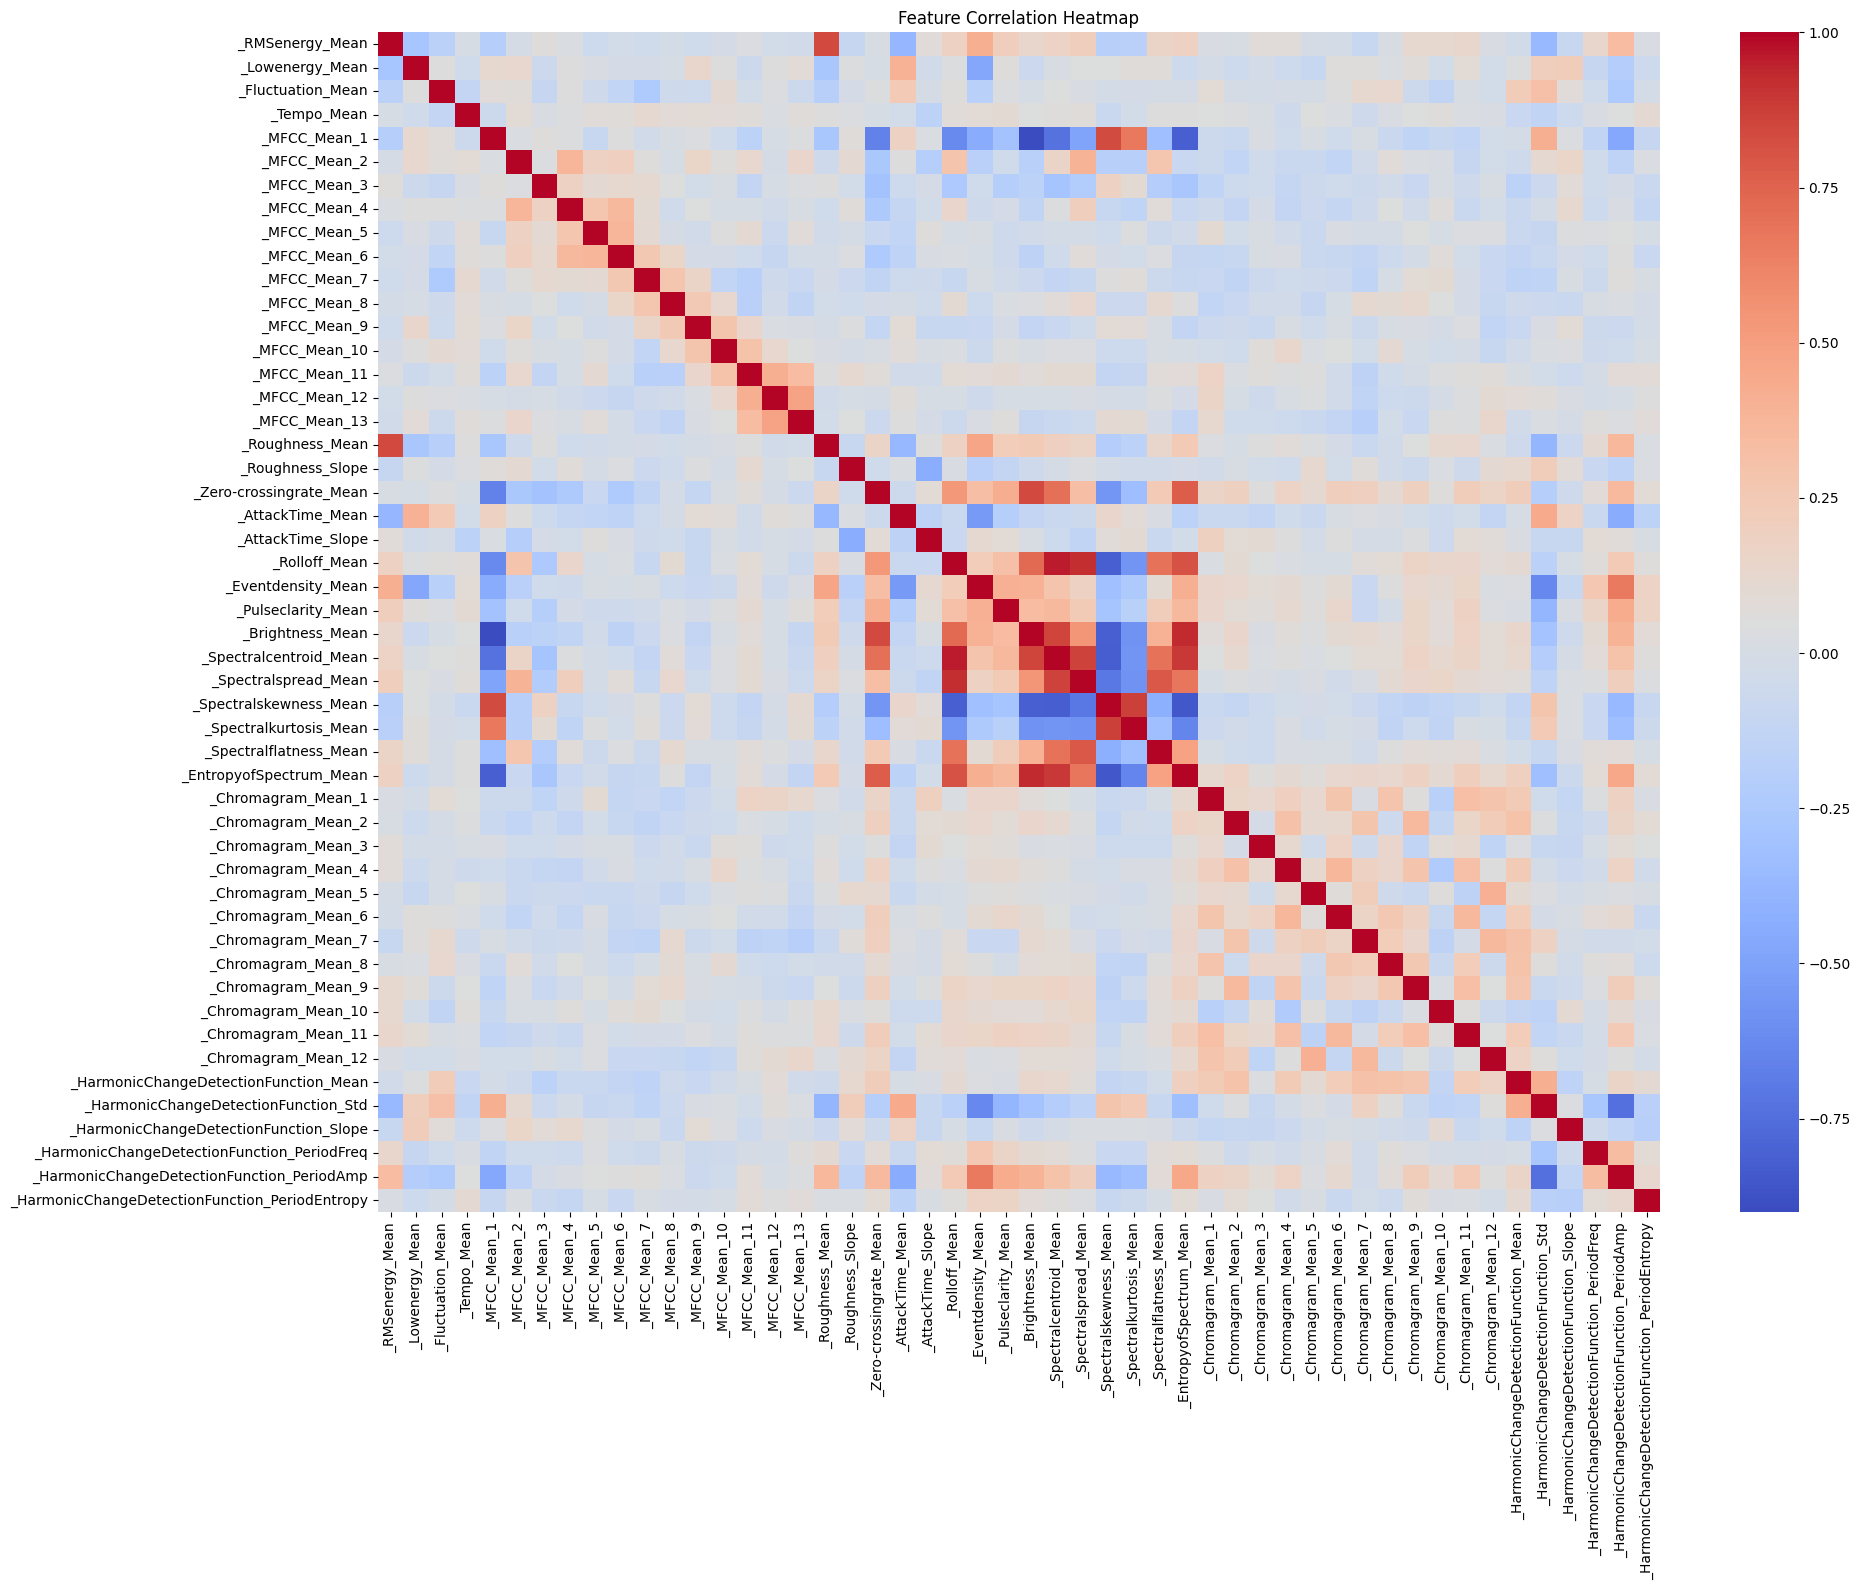

In [10]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

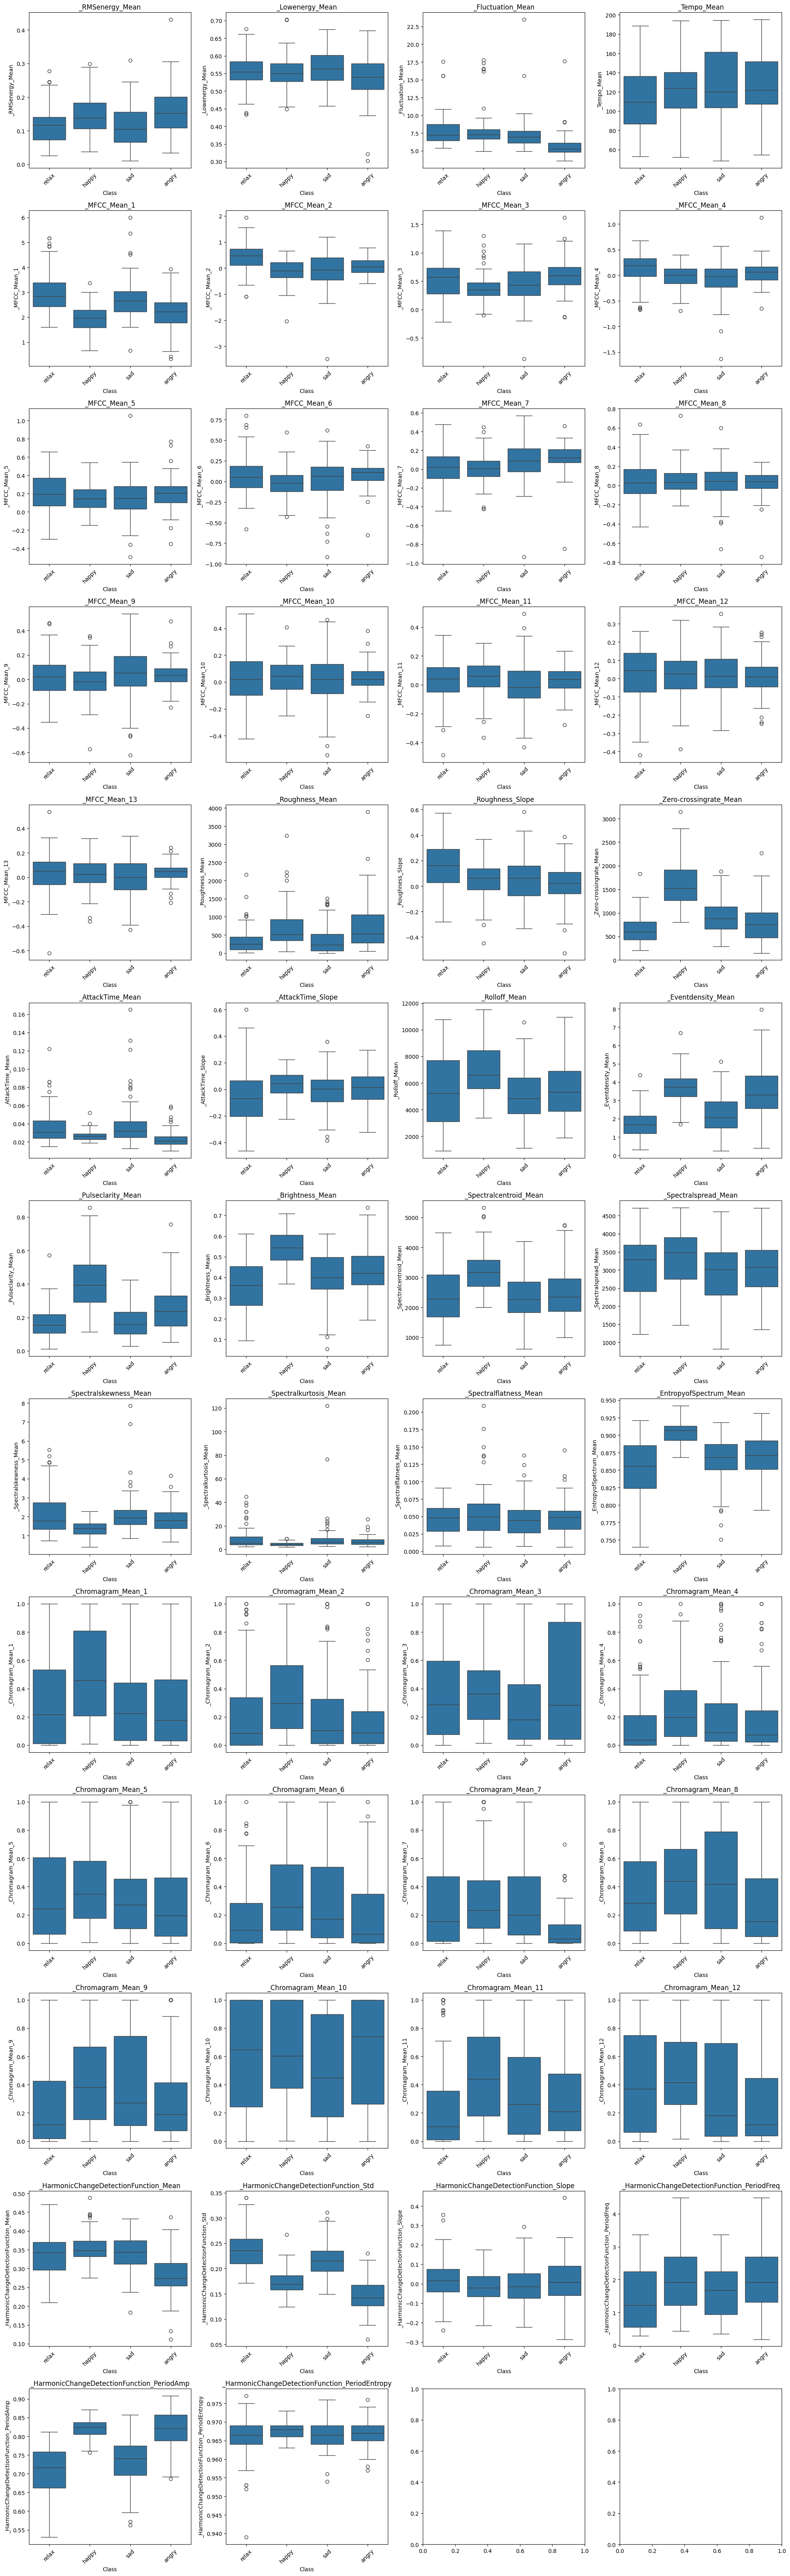

In [11]:
features = df.columns.drop('Class')
n_features = len(features)
n_cols = 4
n_rows = (n_features - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='Class', y=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

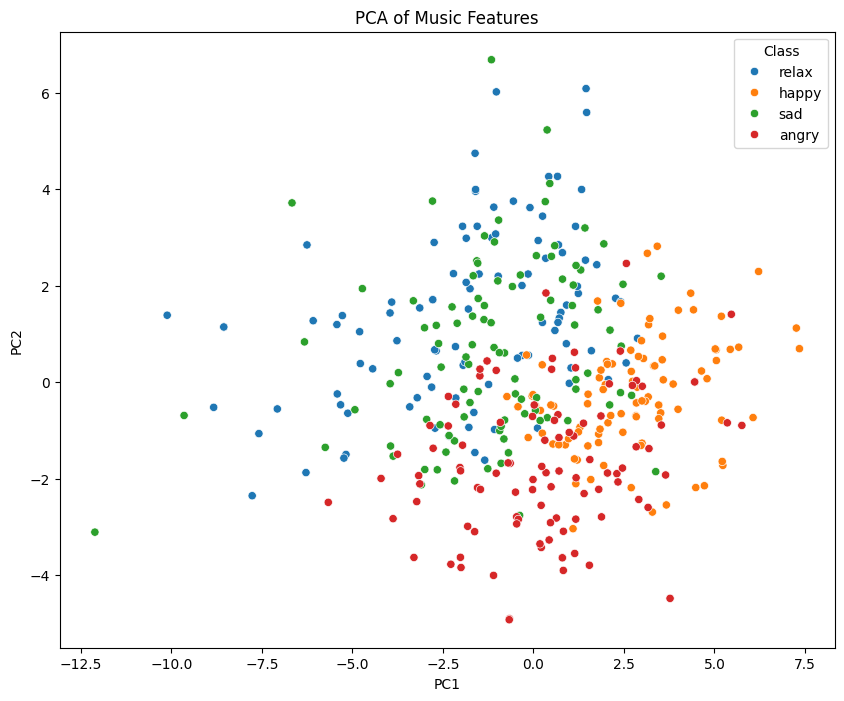

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df)
plt.title('PCA of Music Features')
plt.show()

In [13]:
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)


Explained variance ratio:
[0.1698863  0.07539745]


/var/folders/mk/jjccn6395sb1mc80wk4sxj9w0000gn/T/ipykernel_77096/3504886418.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/var/folders/mk/jjccn6395sb1mc80wk4sxj9w0000gn/T/ipykernel_77096/3504886418.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


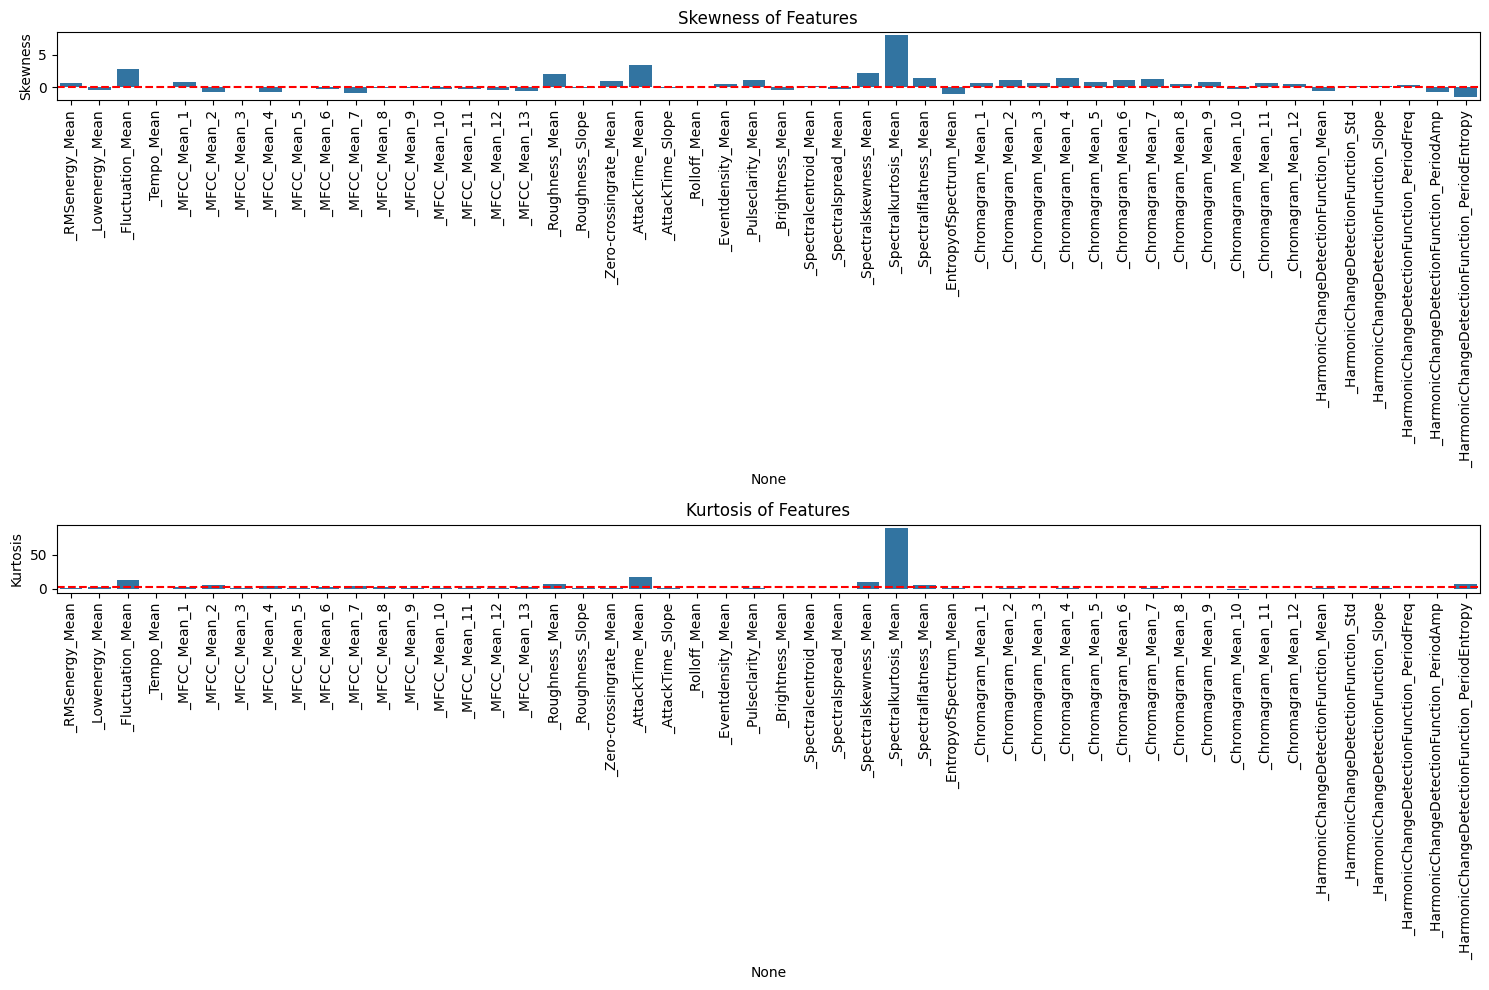

Features with high skewness (>1 or <-1):
                                                Skewness   Kurtosis
_Fluctuation_Mean                               2.890519  12.726443
_Roughness_Mean                                 2.083585   6.731580
_AttackTime_Mean                                3.382562  17.108481
_Pulseclarity_Mean                              1.160820   1.214108
_Spectralskewness_Mean                          2.278226   9.116533
_Spectralkurtosis_Mean                          7.971087  89.679342
_Spectralflatness_Mean                          1.486034   5.167494
_Chromagram_Mean_2                              1.206974   0.431674
_Chromagram_Mean_4                              1.485509   1.477103
_Chromagram_Mean_6                              1.113701   0.187542
_Chromagram_Mean_7                              1.334623   0.926006
_HarmonicChangeDetectionFunction_PeriodEntropy -1.481047   7.570746

Features with high kurtosis (>7):
                                        

In [15]:

skewness = df.drop('Class', axis=1).skew()
kurtosis = df.drop('Class', axis=1).kurtosis()

# Create a DataFrame for easier visualization
dist_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

# Plot skewness and kurtosis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

sns.barplot(x=dist_df.index, y='Skewness', data=dist_df, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Skewness of Features')
ax1.axhline(y=0, color='r', linestyle='--')

sns.barplot(x=dist_df.index, y='Kurtosis', data=dist_df, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Kurtosis of Features')
ax2.axhline(y=3, color='r', linestyle='--')  # Normal distribution has kurtosis of 3

plt.tight_layout()
plt.show()

# Print features with high skewness or kurtosis
print("Features with high skewness (>1 or <-1):")
print(dist_df[np.abs(dist_df['Skewness']) > 1])

print("\nFeatures with high kurtosis (>7):")
print(dist_df[dist_df['Kurtosis'] > 7])

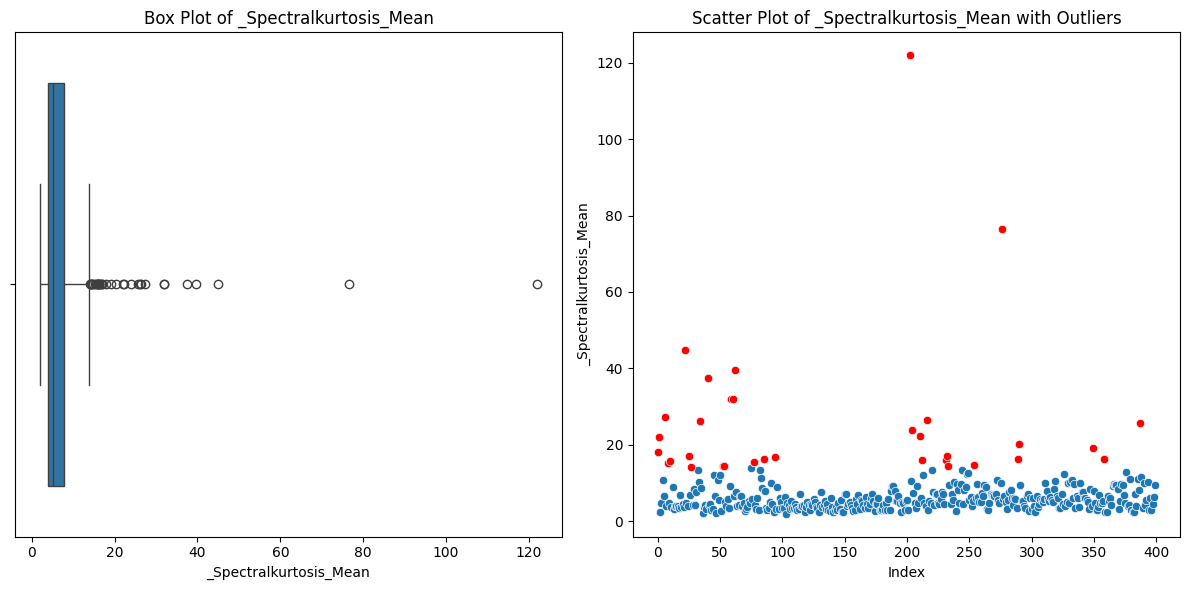

Number of outliers detected: 33
Summary of outliers:
count     33.000000
mean      26.221212
std       21.241455
min       14.081000
25%       16.024000
50%       18.037000
75%       26.397000
max      121.996000
Name: _Spectralkurtosis_Mean, dtype: float64


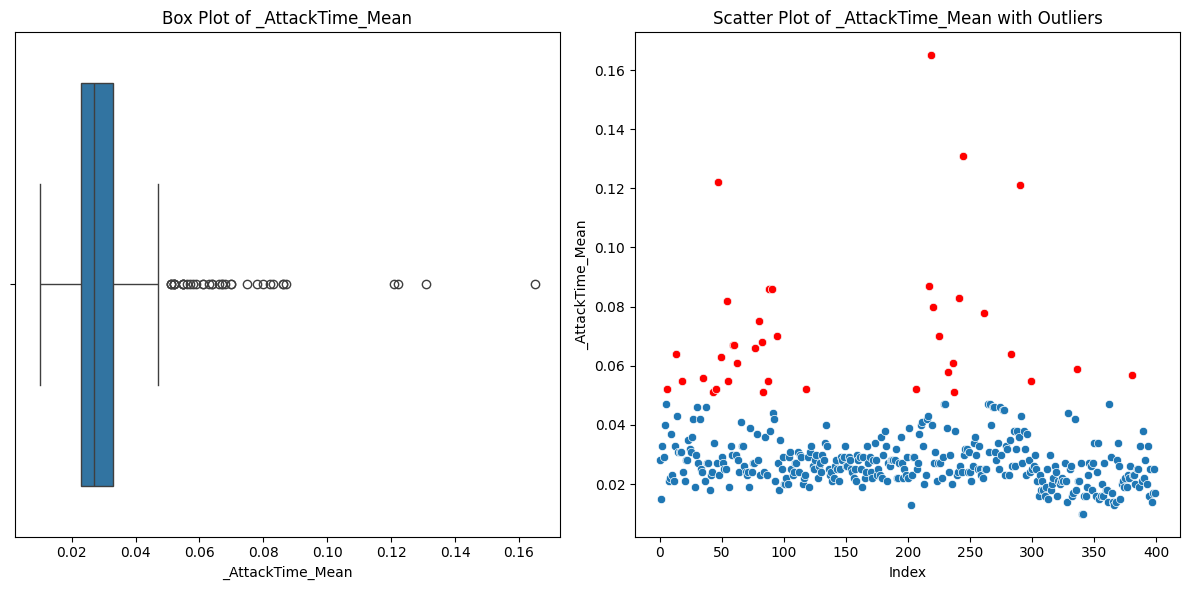

Number of outliers detected: 38
Summary of outliers:
count    38.000000
mean      0.071789
std       0.025182
min       0.051000
25%       0.055000
50%       0.064000
75%       0.079500
max       0.165000
Name: _AttackTime_Mean, dtype: float64


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers(data, feature, threshold=1.5):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

def plot_outliers(data, feature, threshold=1.5):
    plt.figure(figsize=(12, 6))
    
    # Box plot
    plt.subplot(121)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    
    # Scatter plot
    plt.subplot(122)
    outliers = detect_outliers(data, feature, threshold)
    sns.scatterplot(x=range(len(data)), y=data[feature])
    sns.scatterplot(x=outliers.index, y=outliers[feature], color='red')
    plt.title(f'Scatter Plot of {feature} with Outliers')
    plt.xlabel('Index')
    plt.ylabel(feature)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Number of outliers detected: {len(outliers)}")
    print("Summary of outliers:")
    print(outliers[feature].describe())

# Example usage
plot_outliers(df, '_Spectralkurtosis_Mean')
plot_outliers(df, '_AttackTime_Mean')

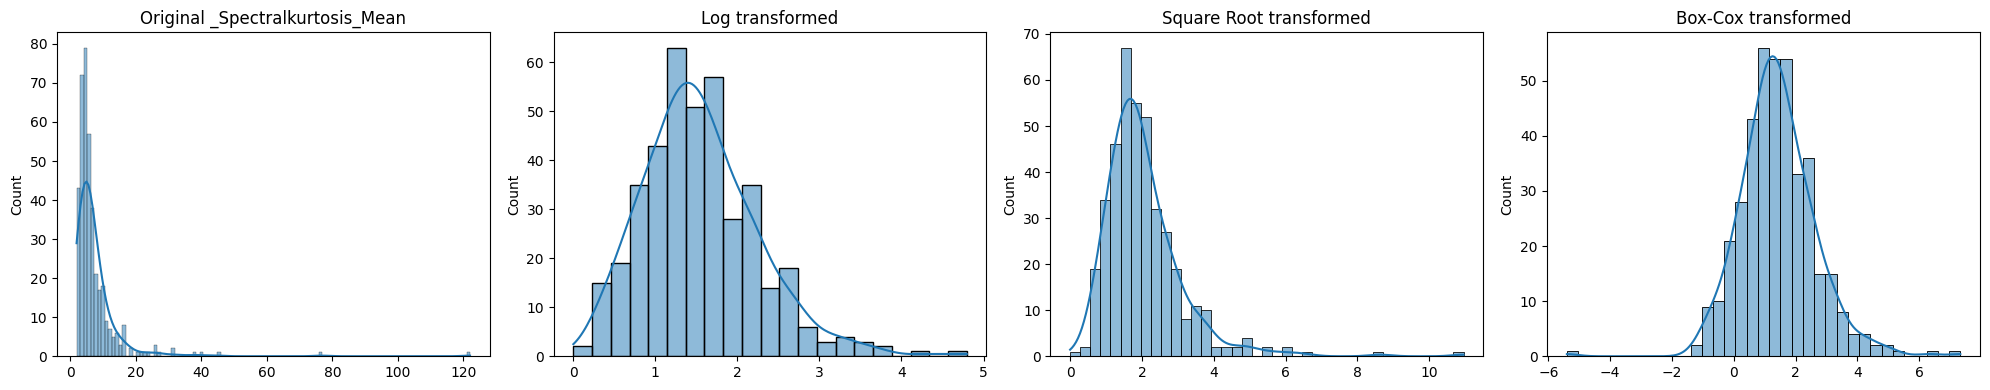

Original _Spectralkurtosis_Mean:
Skewness: 7.941
Kurtosis: 88.547

Log transformed:
Skewness: 0.816
Kurtosis: 1.449

Square Root transformed:
Skewness: 2.699
Kurtosis: 14.154

Box-Cox transformed:
Skewness: 0.307
Kurtosis: 3.734


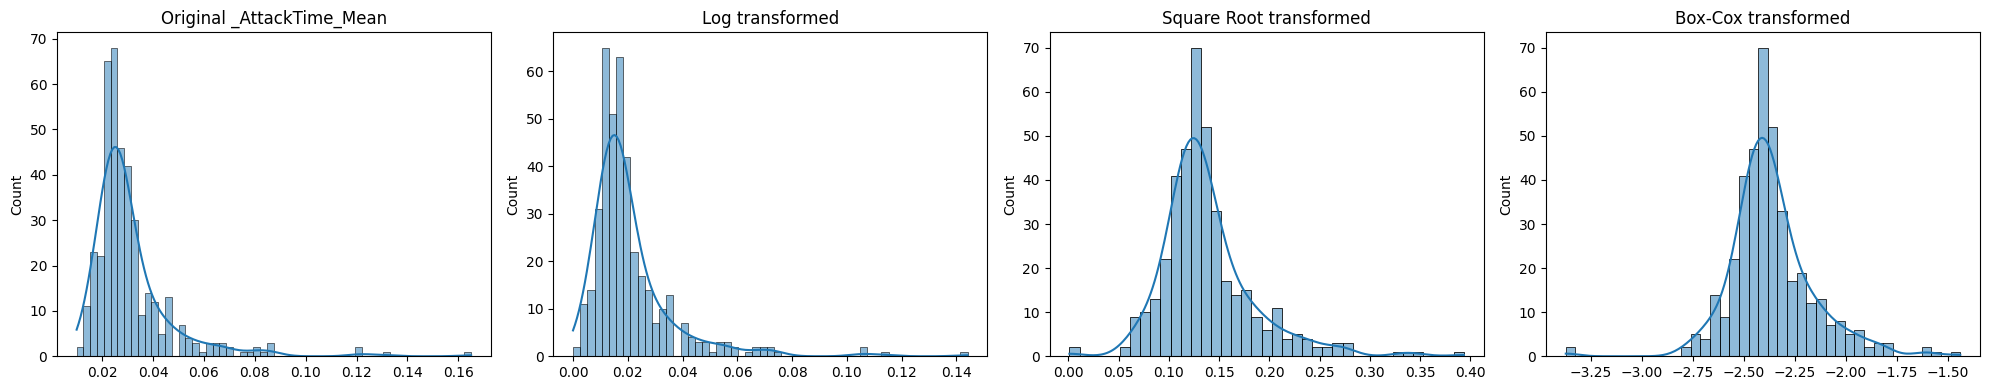

Original _AttackTime_Mean:
Skewness: 3.370
Kurtosis: 16.880

Log transformed:
Skewness: 3.197
Kurtosis: 15.171

Square Root transformed:
Skewness: 1.505
Kurtosis: 4.652

Box-Cox transformed:
Skewness: 0.405
Kurtosis: 4.138


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_transformations(data, feature, transformations):
    n = len(transformations) + 1
    fig, axes = plt.subplots(1, n, figsize=(5*n, 4))
    
    # Original data
    sns.histplot(data[feature], kde=True, ax=axes[0])
    axes[0].set_title(f'Original {feature}')
    axes[0].set_xlabel('')
    
    # Transformations
    for i, (name, func) in enumerate(transformations.items(), 1):
        transformed = func(data[feature])
        sns.histplot(transformed, kde=True, ax=axes[i])
        axes[i].set_title(f'{name} transformed')
        axes[i].set_xlabel('')
    
    plt.tight_layout()
    plt.show()
    
    # Print skewness and kurtosis
    print(f"Original {feature}:")
    print(f"Skewness: {stats.skew(data[feature]):.3f}")
    print(f"Kurtosis: {stats.kurtosis(data[feature]):.3f}")
    
    for name, func in transformations.items():
        transformed = func(data[feature])
        print(f"\n{name} transformed:")
        print(f"Skewness: {stats.skew(transformed):.3f}")
        print(f"Kurtosis: {stats.kurtosis(transformed):.3f}")

# Define transformations
transformations = {
    'Log': lambda x: np.log1p(x - x.min() + 1e-6),
    'Square Root': lambda x: np.sqrt(x - x.min() + 1e-6),
    'Box-Cox': lambda x: stats.boxcox(x - x.min() + 1e-6)[0]
}

# Example usage
plot_transformations(df, '_Spectralkurtosis_Mean', transformations)
plot_transformations(df, '_AttackTime_Mean', transformations)

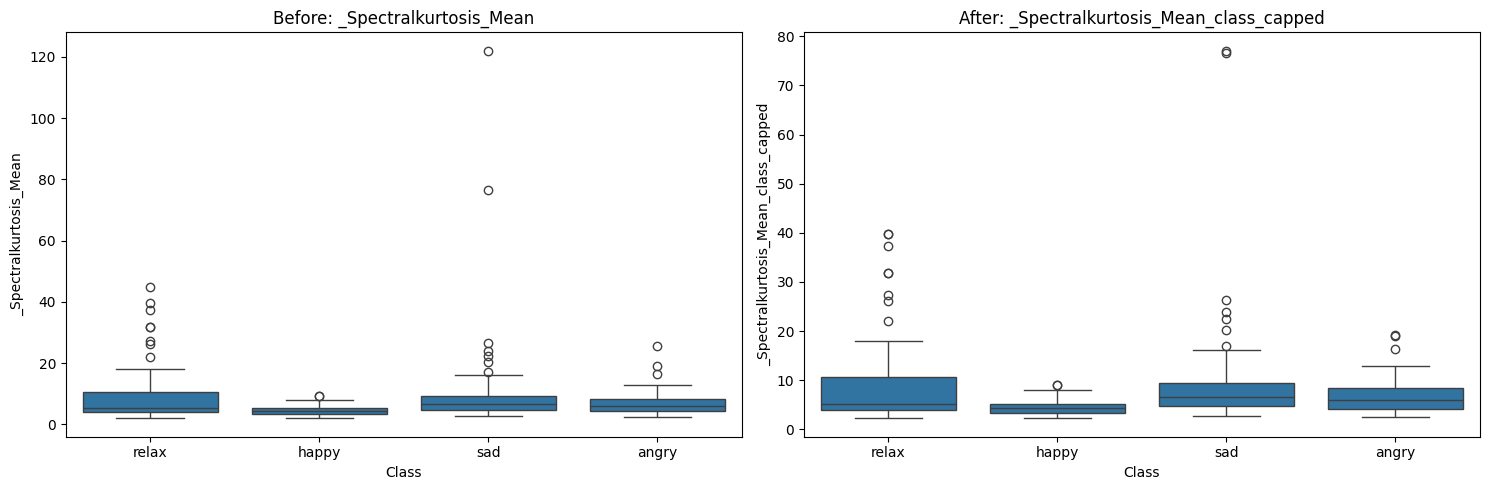

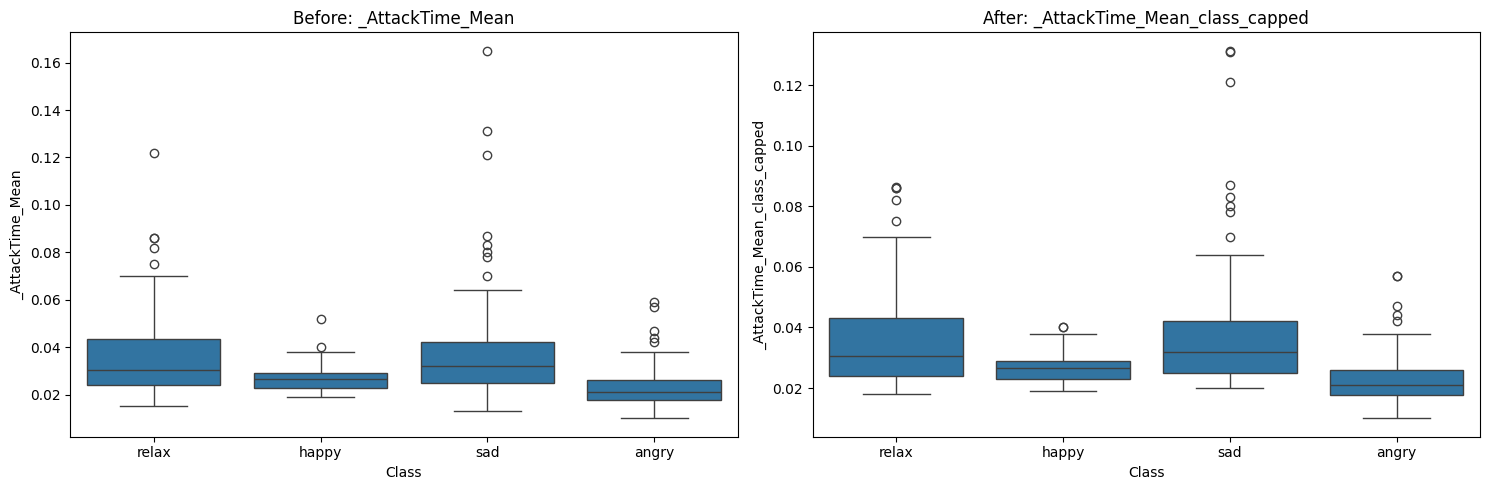

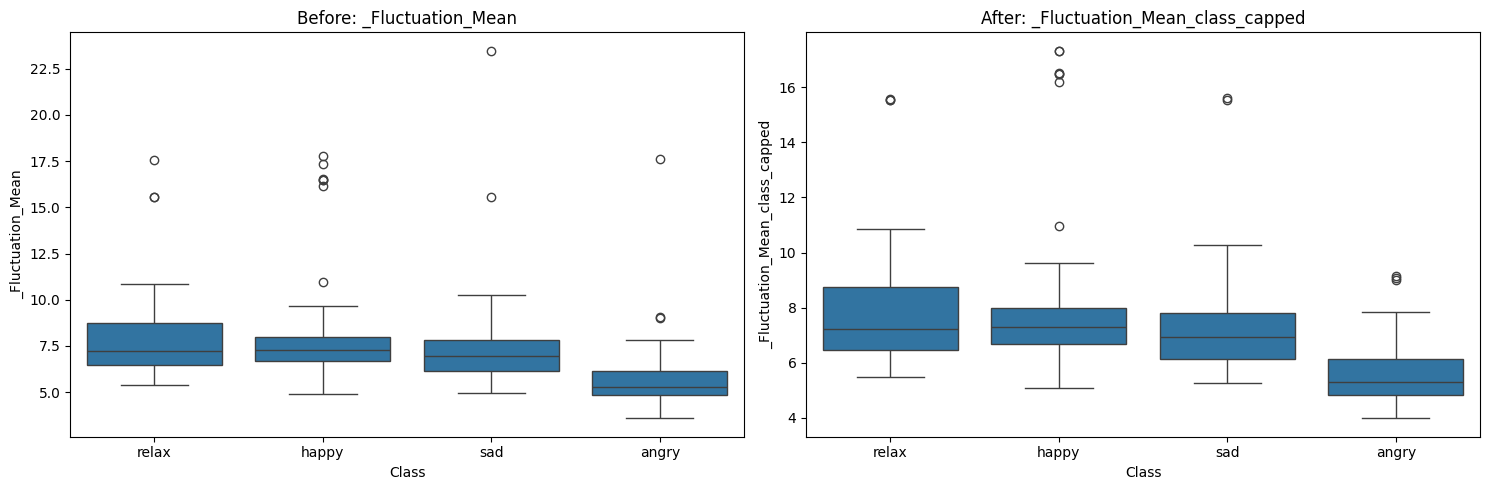

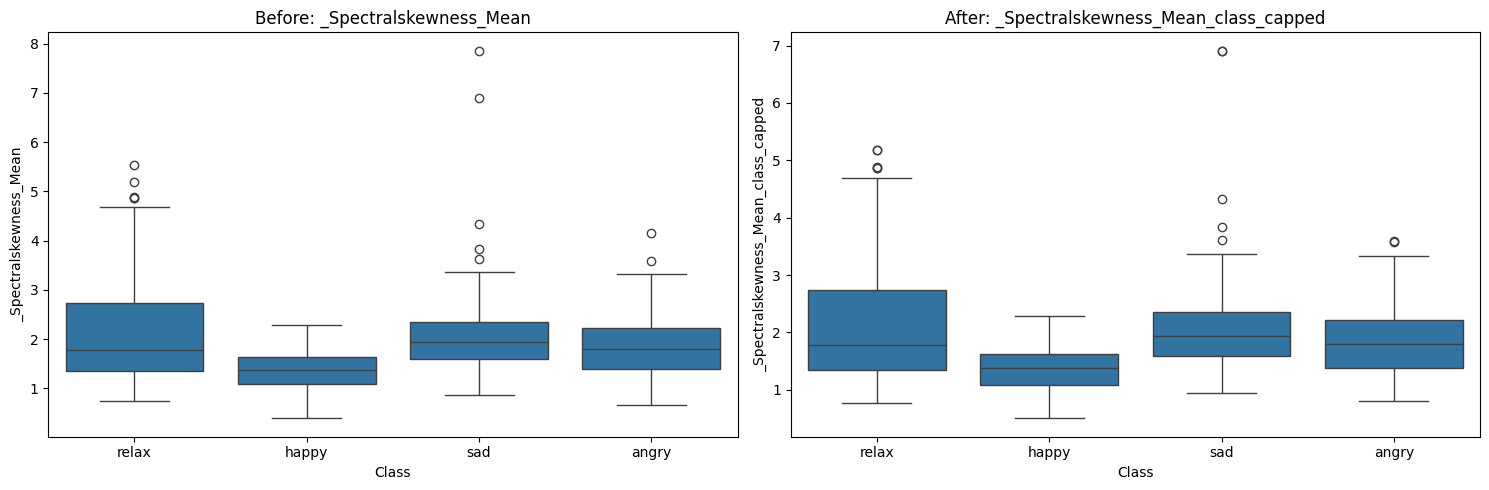

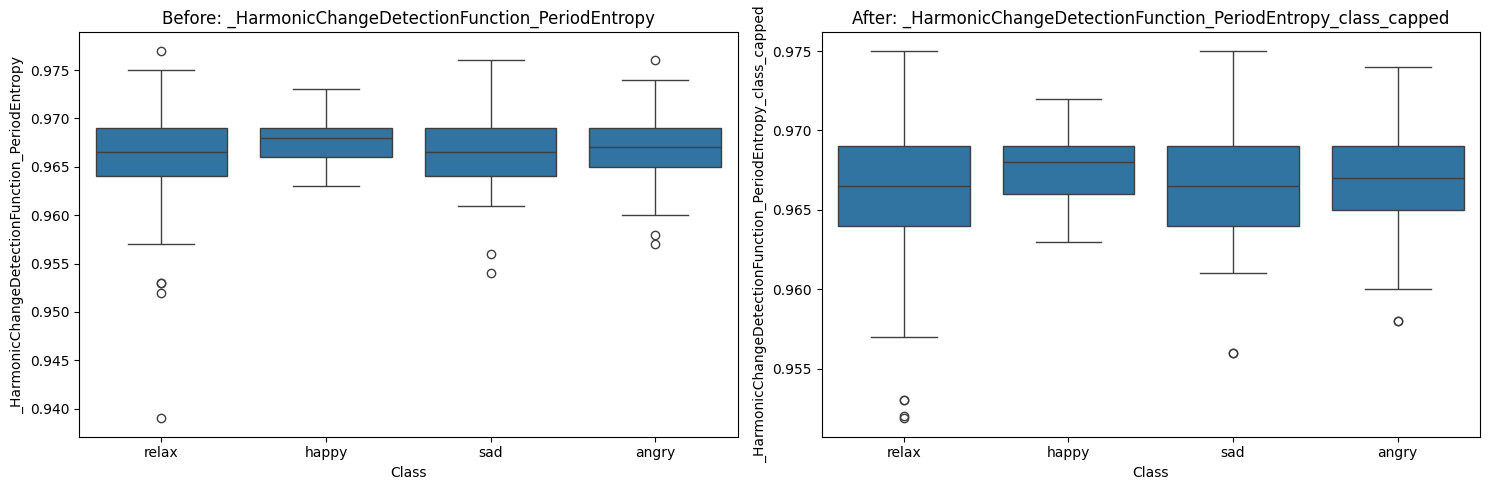

In [19]:
def handle_outliers_by_class(data, feature, class_column, lower_percentile=1, upper_percentile=99):
    data[f'{feature}_class_capped'] = data[feature]
    
    for class_value in data[class_column].unique():
        class_data = data[data[class_column] == class_value]
        lower_limit = np.percentile(class_data[feature], lower_percentile)
        upper_limit = np.percentile(class_data[feature], upper_percentile)
        
        data.loc[data[class_column] == class_value, f'{feature}_class_capped'] = \
            data.loc[data[class_column] == class_value, feature].clip(lower_limit, upper_limit)
    
    return data

def plot_class_specific_handling(data, original_feature, capped_feature, class_column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.boxplot(x=class_column, y=original_feature, data=data, ax=ax1)
    ax1.set_title(f'Before: {original_feature}')
    
    sns.boxplot(x=class_column, y=capped_feature, data=data, ax=ax2)
    ax2.set_title(f'After: {capped_feature}')
    
    plt.tight_layout()
    plt.show()

tmp_df = df.copy()

# List of features with high kurtosis ]
high_kurtosis_features = [
    '_Spectralkurtosis_Mean',
    '_AttackTime_Mean',
    '_Fluctuation_Mean',
    '_Spectralskewness_Mean',
    '_HarmonicChangeDetectionFunction_PeriodEntropy'
]

# Handle outliers for each feature
for feature in high_kurtosis_features:
    tmp_df = handle_outliers_by_class(df, feature, 'Class')
    plot_class_specific_handling(df, feature, f'{feature}_class_capped', 'Class')

# Optional: Replace original features with class-capped versions
for feature in high_kurtosis_features:
    tmp_df[feature] = tmp_df[f'{feature}_class_capped']
    tmp_df = df.drop(f'{feature}_class_capped', axis=1)

# Save the processed dataframe
# df.to_csv('class_specific_processed_data.csv', index=False)

# Pre-processing

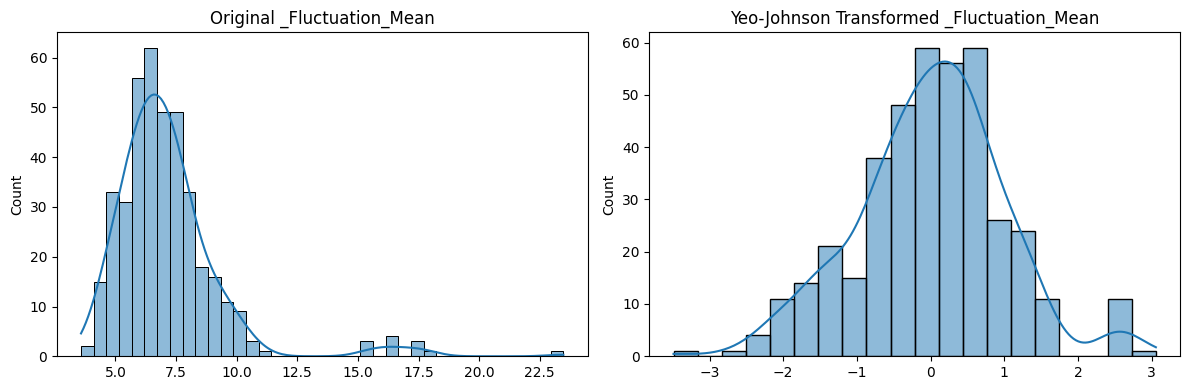

Original _Fluctuation_Mean:
Skewness: 2.880
Kurtosis: 12.553

Transformed _Fluctuation_Mean:
Skewness: -0.054
Kurtosis: 0.583


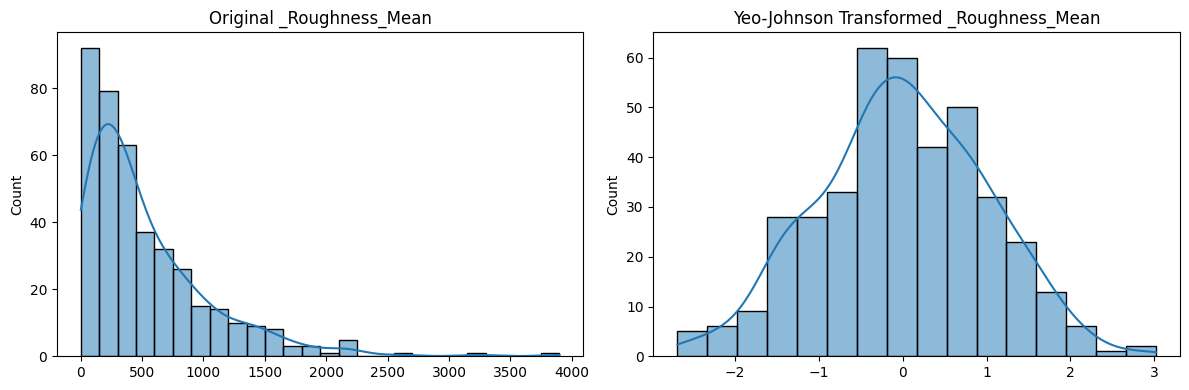

Original _Roughness_Mean:
Skewness: 2.076
Kurtosis: 6.633

Transformed _Roughness_Mean:
Skewness: -0.028
Kurtosis: -0.216


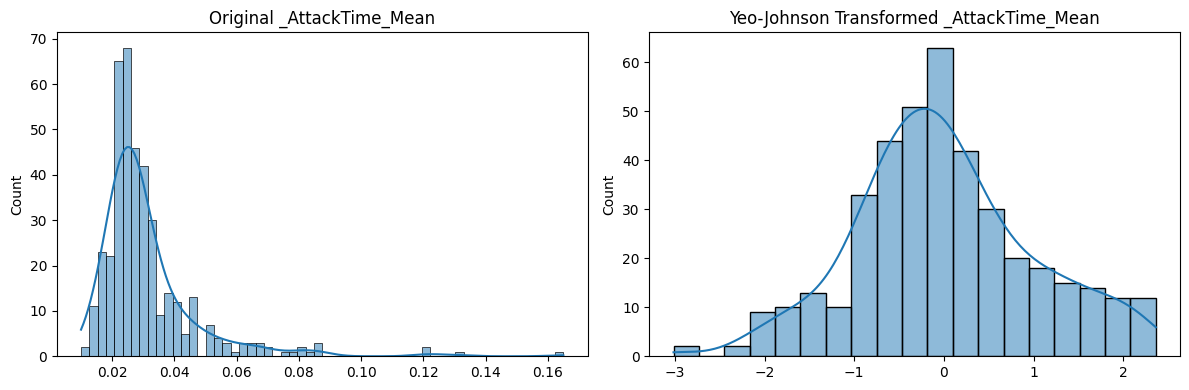

Original _AttackTime_Mean:
Skewness: 3.370
Kurtosis: 16.880

Transformed _AttackTime_Mean:
Skewness: 0.174
Kurtosis: 0.021


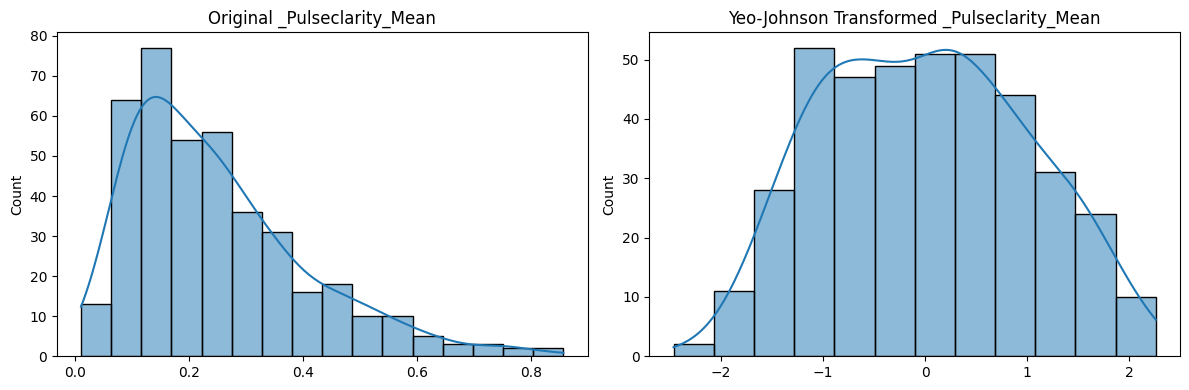

Original _Pulseclarity_Mean:
Skewness: 1.156
Kurtosis: 1.184

Transformed _Pulseclarity_Mean:
Skewness: 0.111
Kurtosis: -0.811


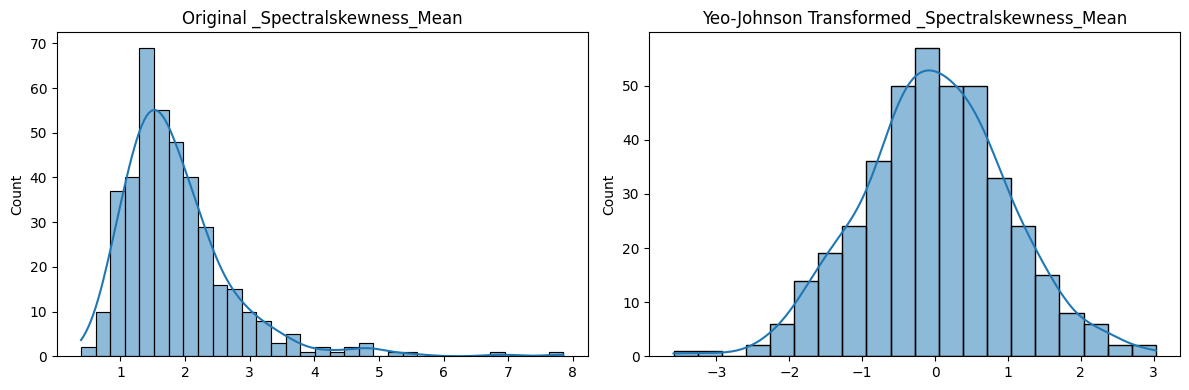

Original _Spectralskewness_Mean:
Skewness: 2.270
Kurtosis: 8.988

Transformed _Spectralskewness_Mean:
Skewness: -0.017
Kurtosis: 0.283


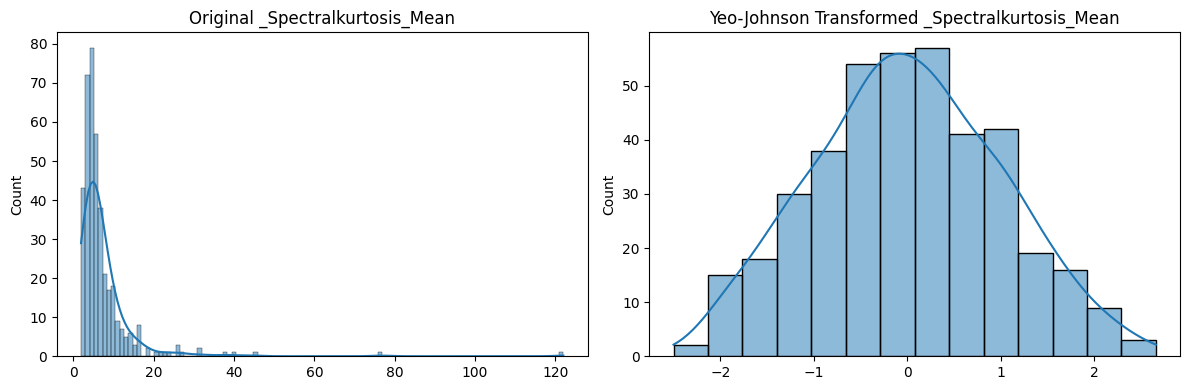

Original _Spectralkurtosis_Mean:
Skewness: 7.941
Kurtosis: 88.547

Transformed _Spectralkurtosis_Mean:
Skewness: 0.071
Kurtosis: -0.447


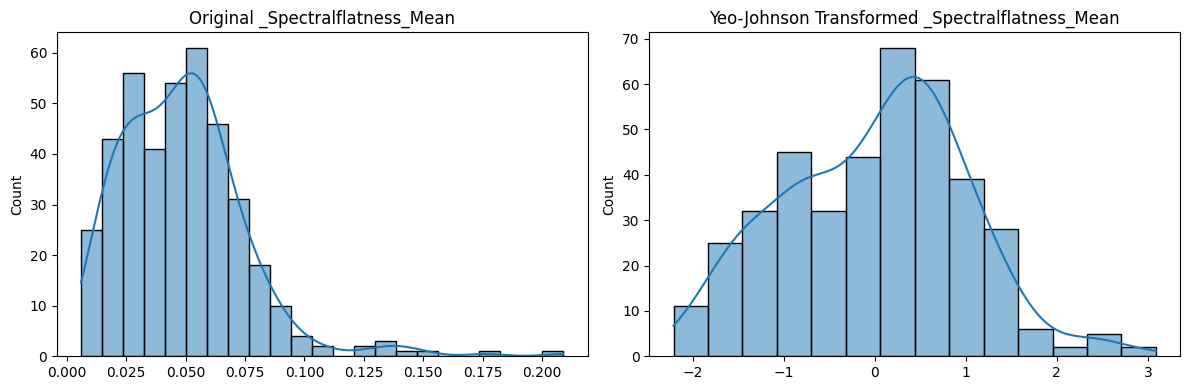

Original _Spectralflatness_Mean:
Skewness: 1.480
Kurtosis: 5.088

Transformed _Spectralflatness_Mean:
Skewness: 0.016
Kurtosis: -0.296


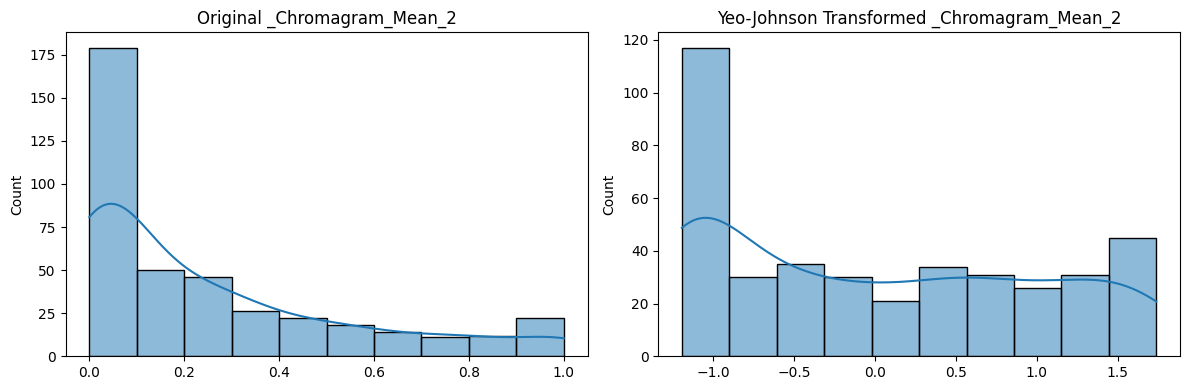

Original _Chromagram_Mean_2:
Skewness: 1.202
Kurtosis: 0.411

Transformed _Chromagram_Mean_2:
Skewness: 0.293
Kurtosis: -1.328


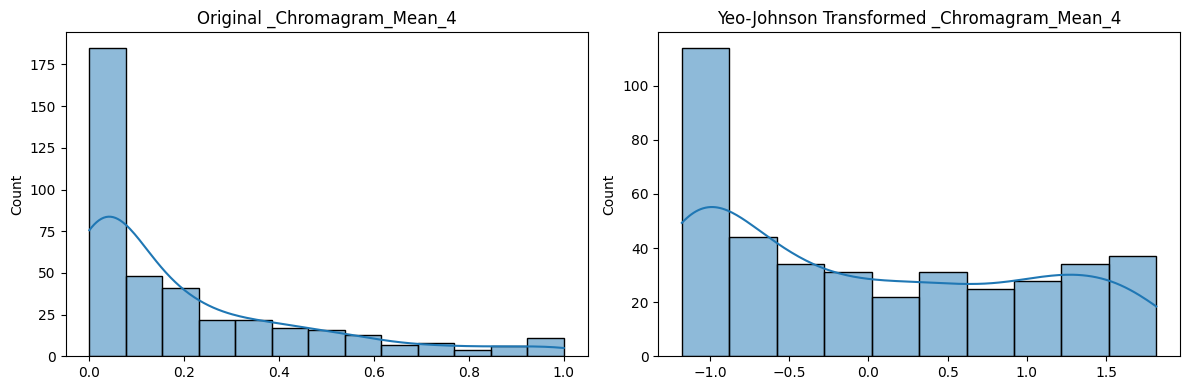

Original _Chromagram_Mean_4:
Skewness: 1.480
Kurtosis: 1.444

Transformed _Chromagram_Mean_4:
Skewness: 0.361
Kurtosis: -1.291


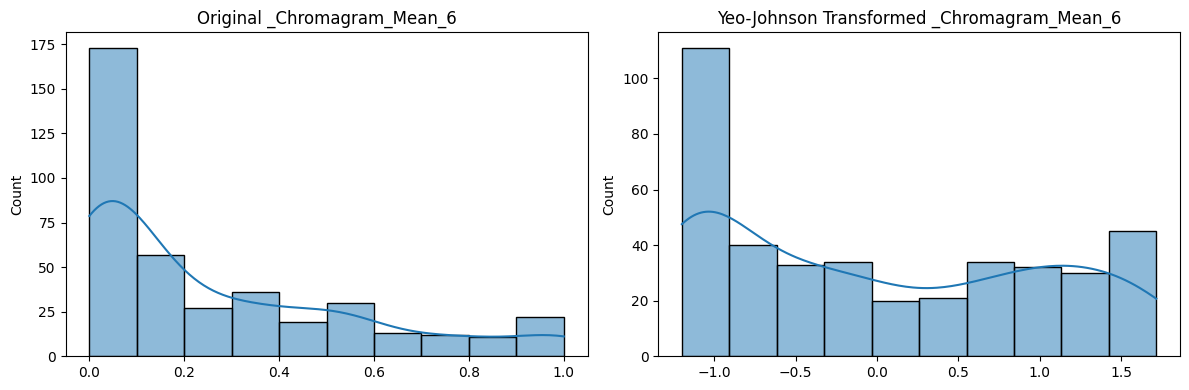

Original _Chromagram_Mean_6:
Skewness: 1.110
Kurtosis: 0.170

Transformed _Chromagram_Mean_6:
Skewness: 0.283
Kurtosis: -1.373


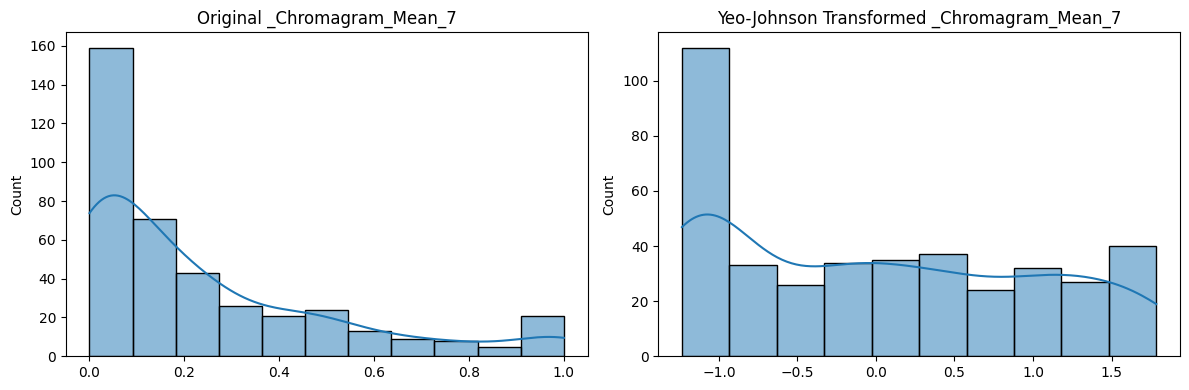

Original _Chromagram_Mean_7:
Skewness: 1.330
Kurtosis: 0.900

Transformed _Chromagram_Mean_7:
Skewness: 0.285
Kurtosis: -1.259


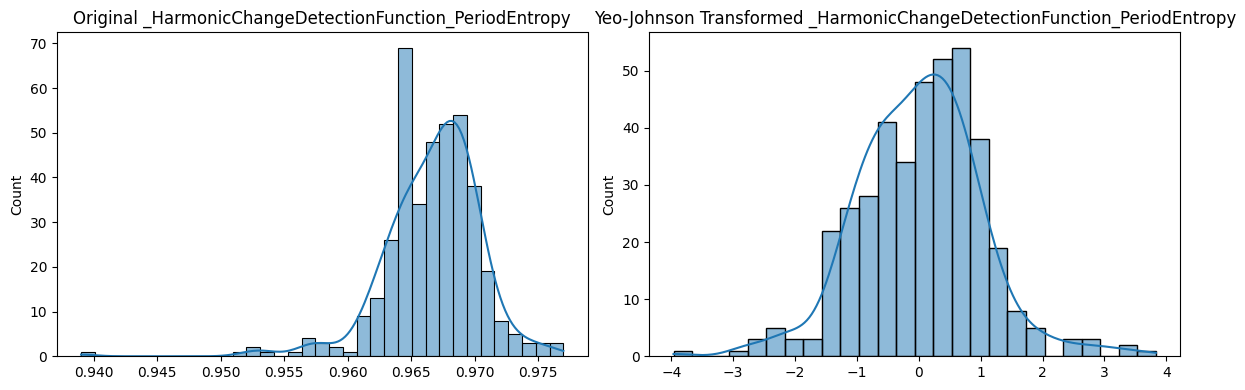

Original _HarmonicChangeDetectionFunction_PeriodEntropy:
Skewness: -1.475
Kurtosis: 7.461

Transformed _HarmonicChangeDetectionFunction_PeriodEntropy:
Skewness: 0.111
Kurtosis: 1.493


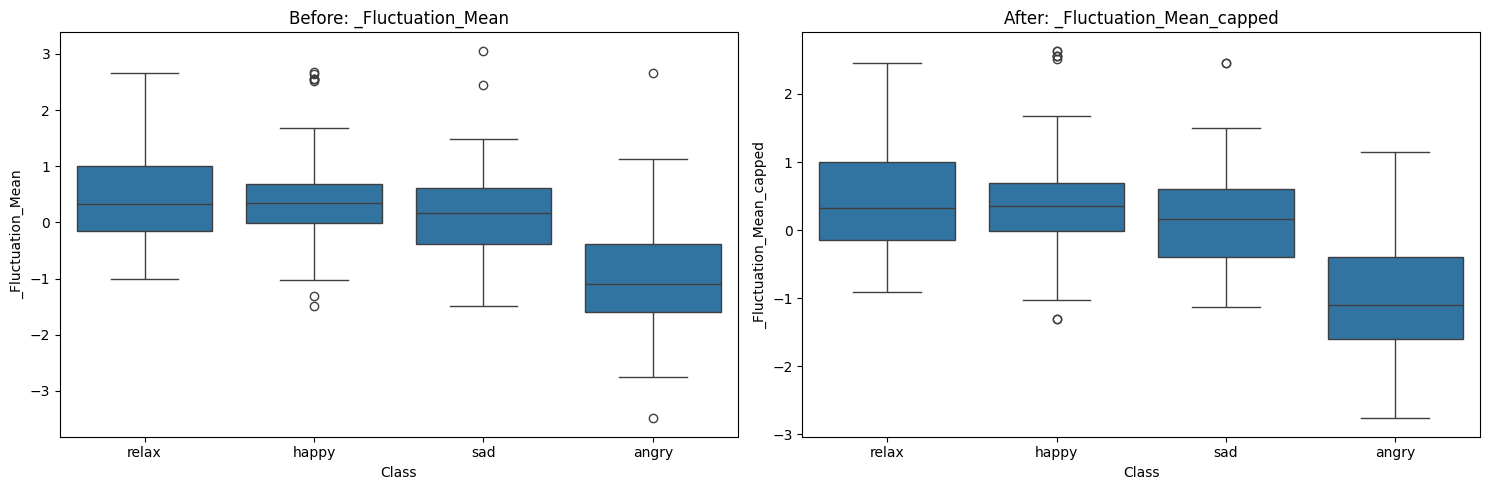

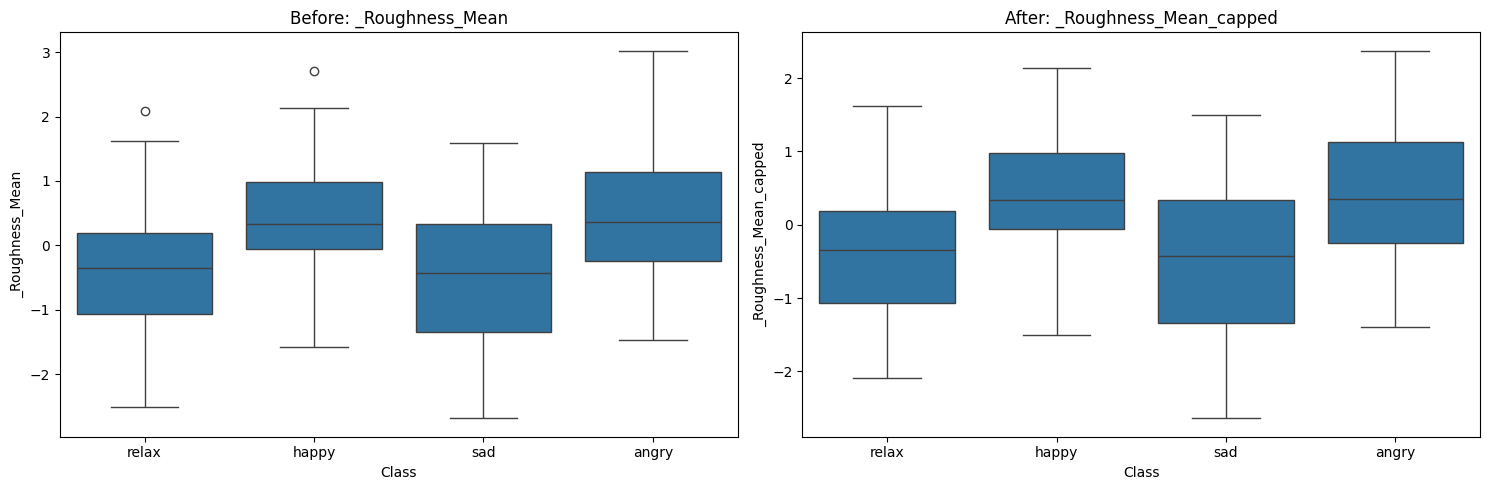

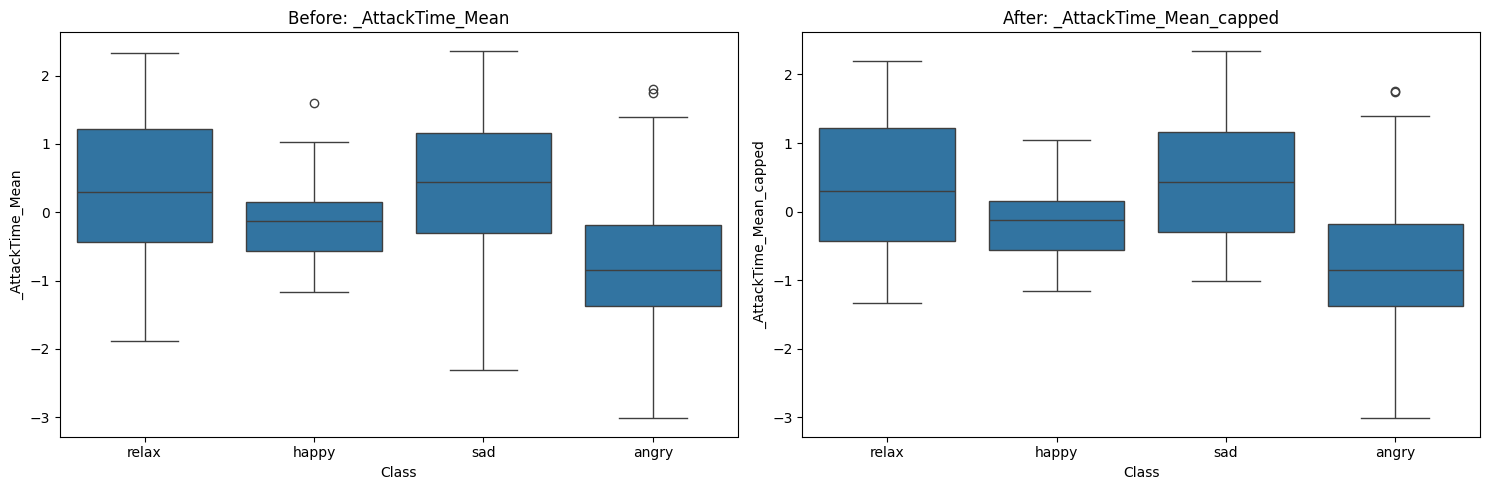

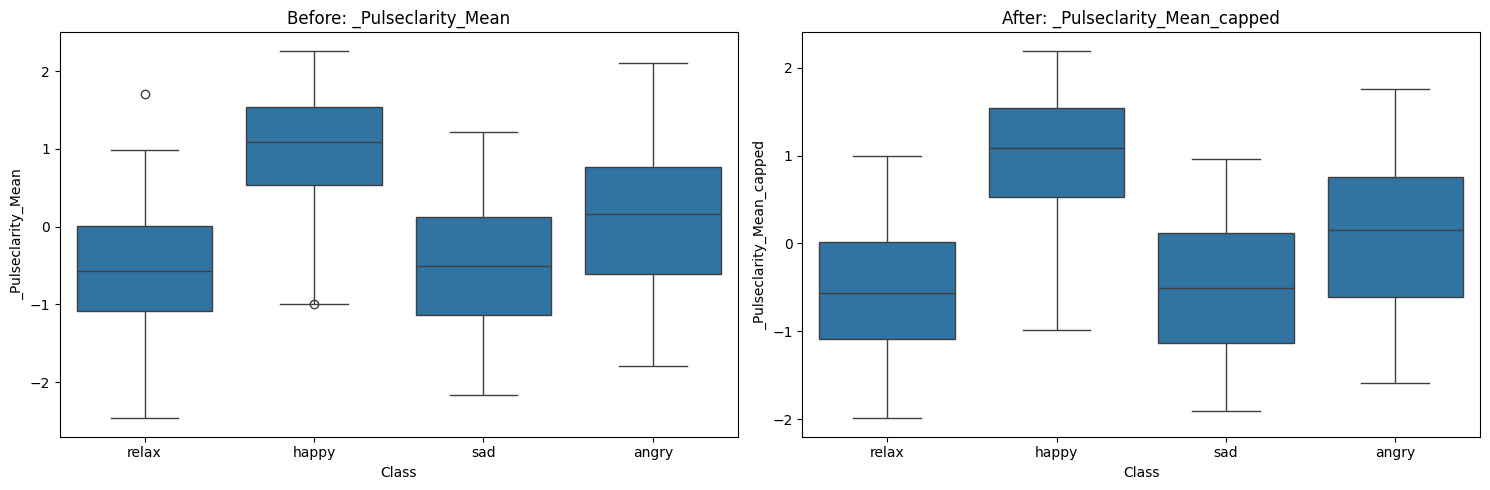

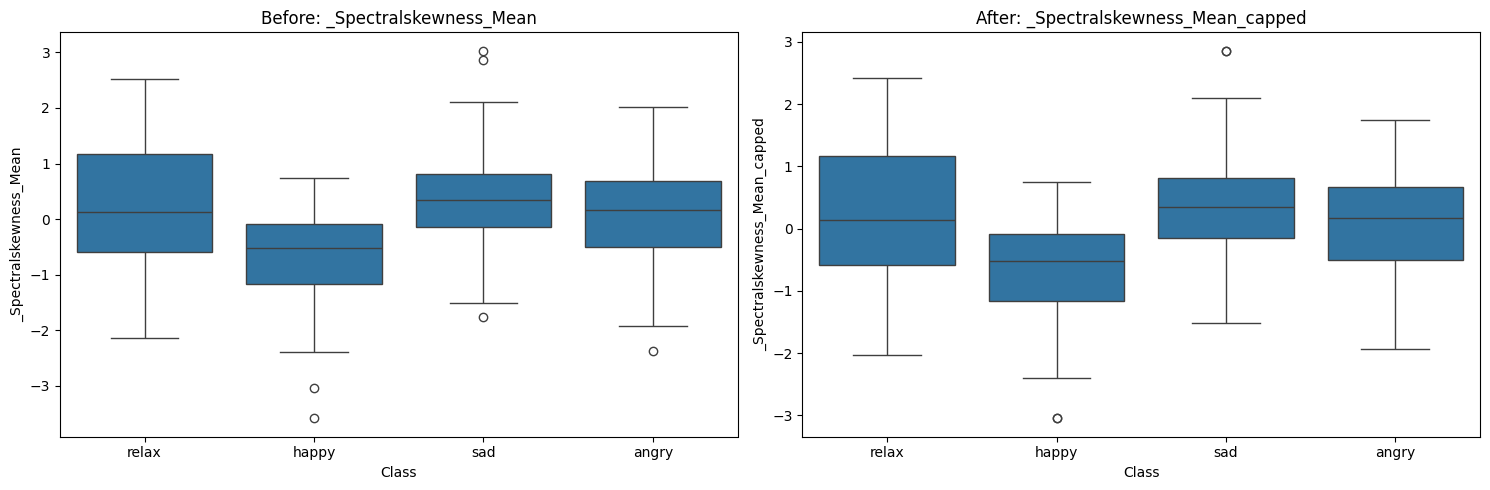

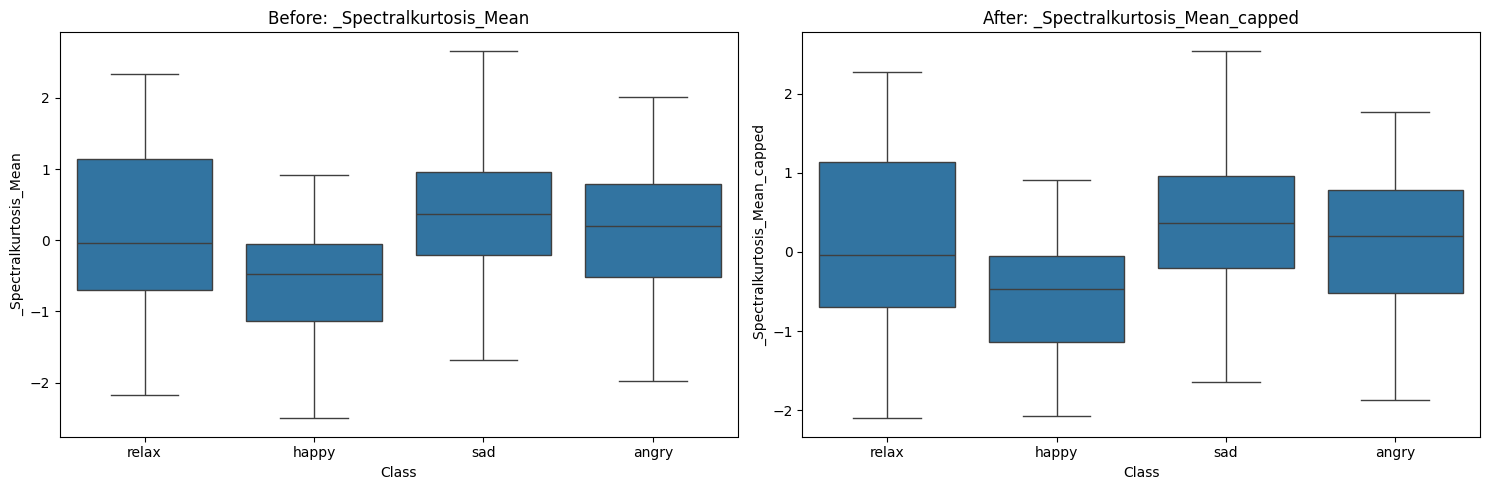

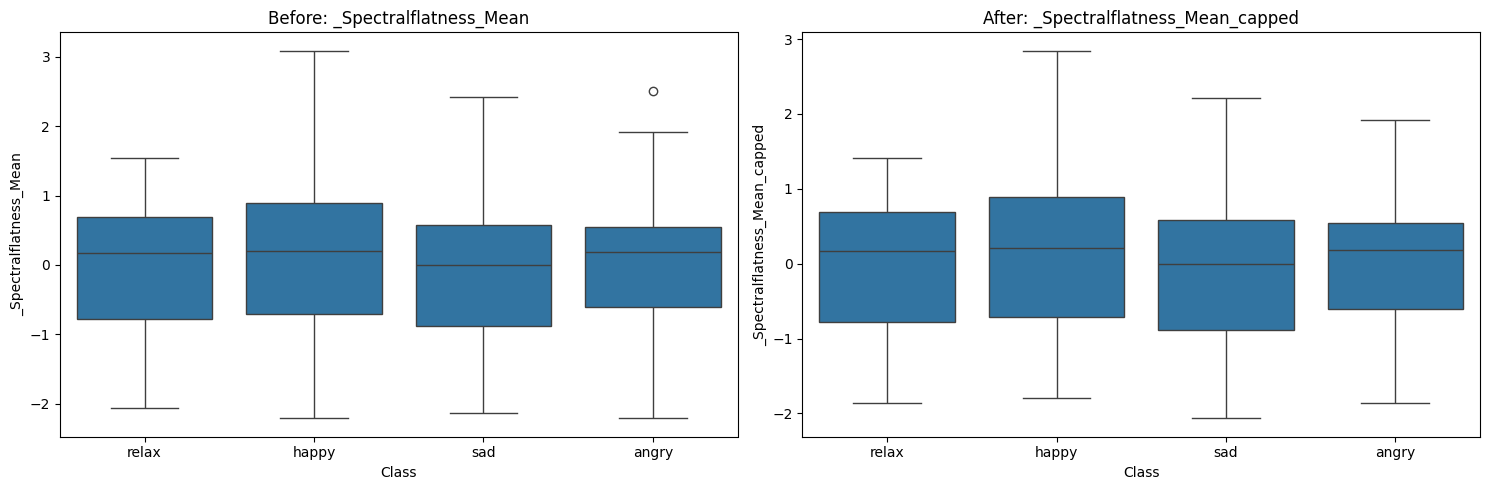

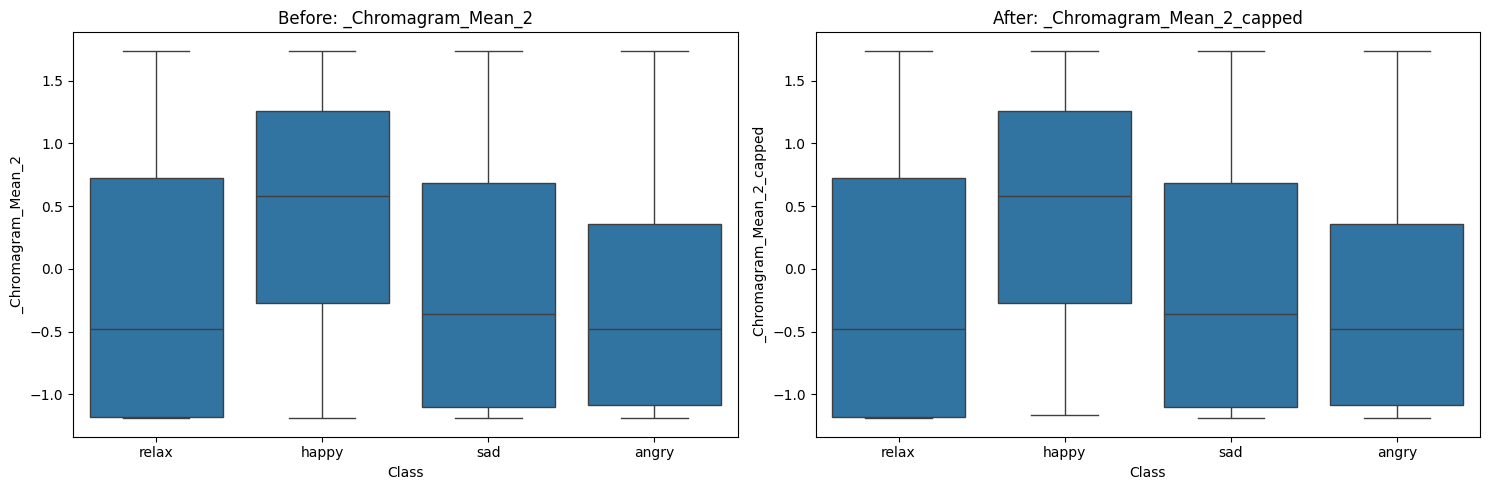

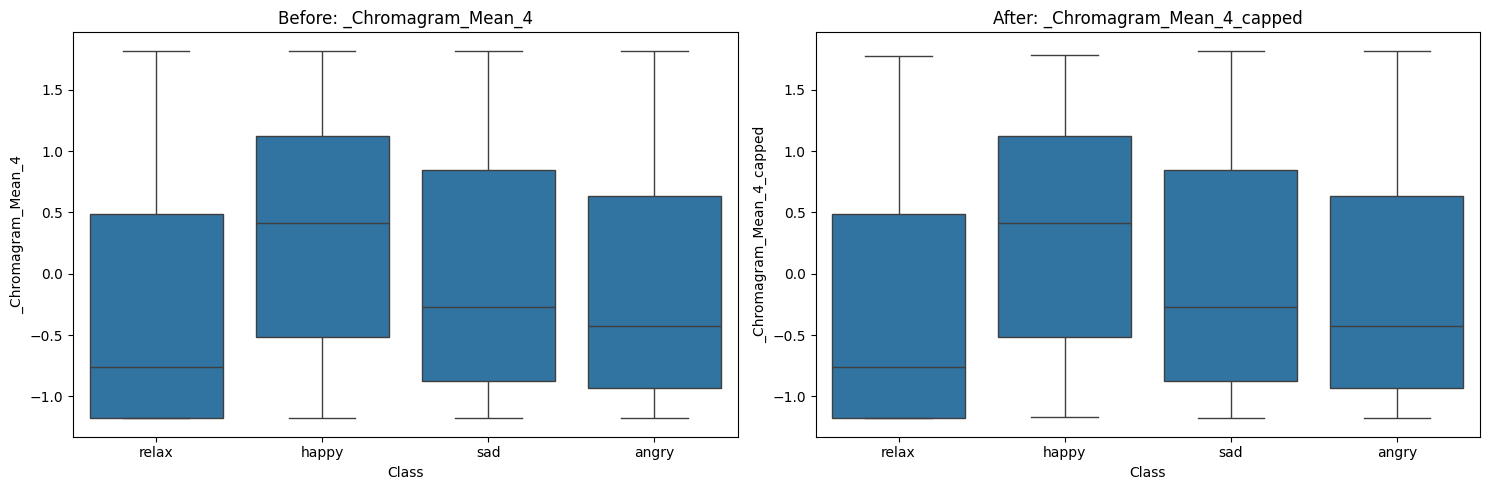

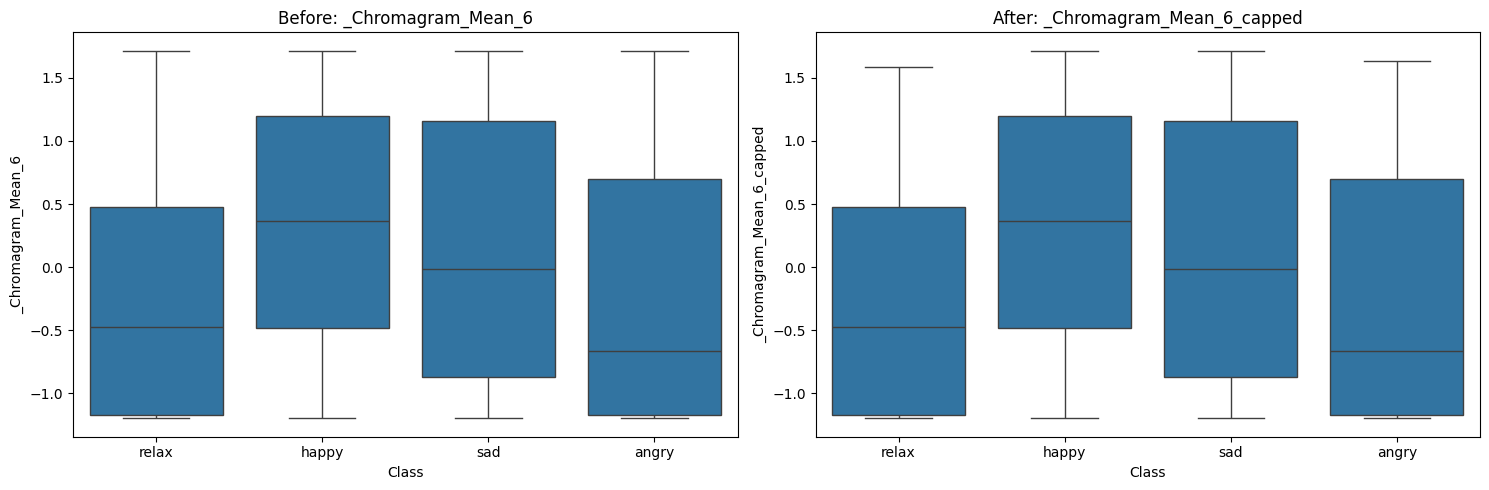

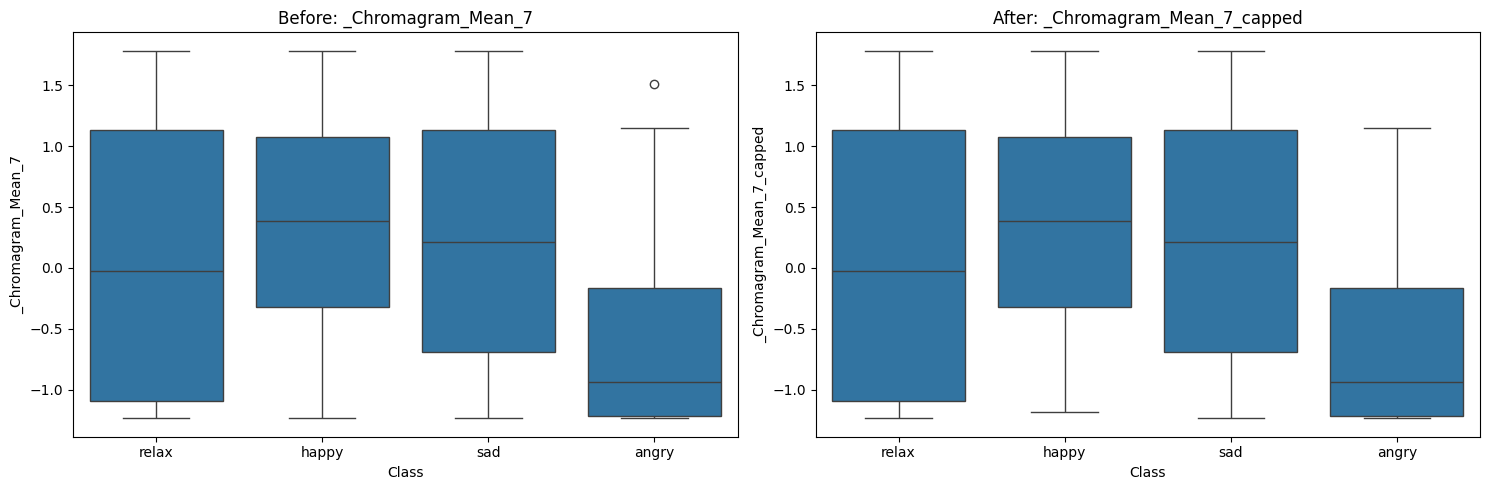

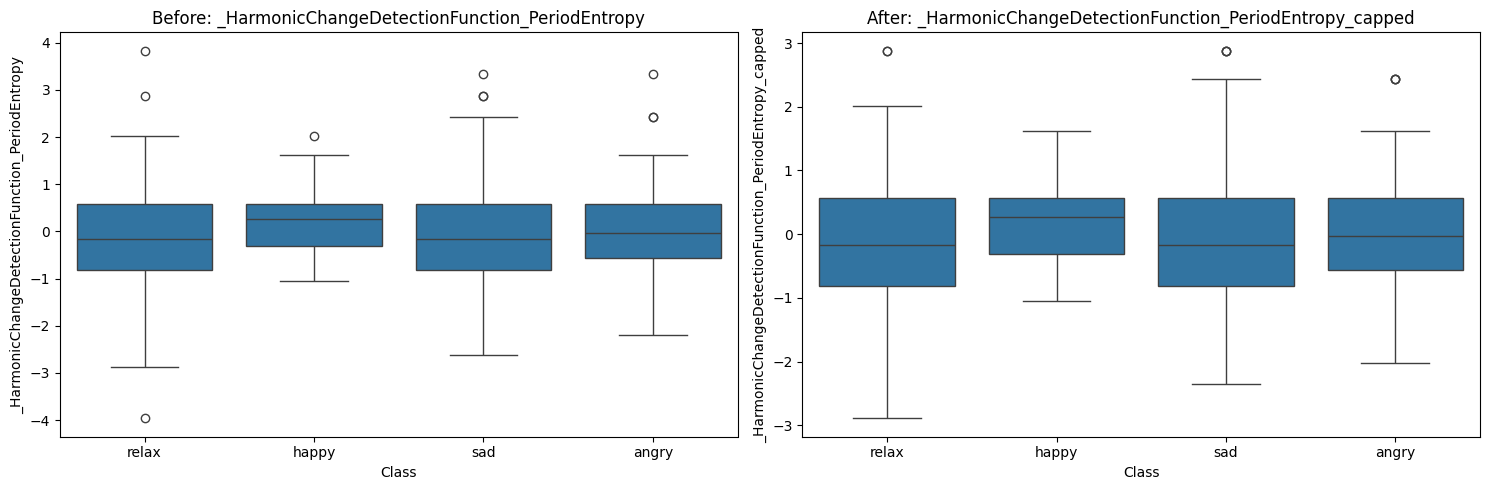

Preprocessing completed. Fully processed data saved to 'fully_processed_data.csv'

Summary statistics of processed data:
       _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
count       400.000000       400.000000         400.000000   400.000000   
mean          0.134650         0.553605          -0.002532   123.682020   
std           0.064368         0.050750           0.980294    34.234344   
min           0.010000         0.302000          -2.764919    48.284000   
25%           0.085000         0.523000          -0.593919   101.490250   
50%           0.128000         0.553000           0.029777   120.132500   
75%           0.174000         0.583250           0.619452   148.986250   
max           0.431000         0.703000           2.635005   195.026000   

       _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
count    400.000000    400.000000    400.000000    400.000000    400.000000   
mean       2.456422      0.071890      0.4880

In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

def plot_transformations(data, feature, original, transformed):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(original, kde=True, ax=ax1)
    ax1.set_title(f'Original {feature}')
    ax1.set_xlabel('')
    
    sns.histplot(transformed, kde=True, ax=ax2)
    ax2.set_title(f'Yeo-Johnson Transformed {feature}')
    ax2.set_xlabel('')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Original {feature}:")
    print(f"Skewness: {stats.skew(original):.3f}")
    print(f"Kurtosis: {stats.kurtosis(original):.3f}")
    
    print(f"\nTransformed {feature}:")
    print(f"Skewness: {stats.skew(transformed):.3f}")
    print(f"Kurtosis: {stats.kurtosis(transformed):.3f}")

def handle_outliers_by_class(data, feature, class_column, lower_percentile=1, upper_percentile=99):
    data[f'{feature}_capped'] = data[feature]
    
    for class_value in data[class_column].unique():
        class_data = data[data[class_column] == class_value]
        lower_limit = np.percentile(class_data[feature], lower_percentile)
        upper_limit = np.percentile(class_data[feature], upper_percentile)
        
        data.loc[data[class_column] == class_value, f'{feature}_capped'] = \
            data.loc[data[class_column] == class_value, feature].clip(lower_limit, upper_limit)
    
    return data

def plot_class_specific_handling(data, original_feature, capped_feature, class_column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.boxplot(x=class_column, y=original_feature, data=data, ax=ax1)
    ax1.set_title(f'Before: {original_feature}')
    
    sns.boxplot(x=class_column, y=capped_feature, data=data, ax=ax2)
    ax2.set_title(f'After: {capped_feature}')
    
    plt.tight_layout()
    plt.show()

df = pd.read_csv('acoustic_features.csv')

# Features with high skewness and kurtosis (from previous analysis)
skewed_features = [
    '_Fluctuation_Mean',
    '_Roughness_Mean',
    '_AttackTime_Mean',
    '_Pulseclarity_Mean',
    '_Spectralskewness_Mean',
    '_Spectralkurtosis_Mean',
    '_Spectralflatness_Mean',
    '_Chromagram_Mean_2',
    '_Chromagram_Mean_4',
    '_Chromagram_Mean_6',
    '_Chromagram_Mean_7',
    '_HarmonicChangeDetectionFunction_PeriodEntropy'
]

# Initialize PowerTransformer (Box-Cox)
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Apply Box-Cox transformation
df_transformed = df.copy()
df_transformed[skewed_features] = pt.fit_transform(df[skewed_features])

# Plot before and after transformation
for feature in skewed_features:
    plot_transformations(df, feature, df[feature], df_transformed[feature])

# Handle outliers for transformed features
for feature in skewed_features:
    df_transformed = handle_outliers_by_class(df_transformed, feature, 'Class')
    plot_class_specific_handling(df_transformed, feature, f'{feature}_capped', 'Class')

# Replace transformed features with capped versions
for feature in skewed_features:
    df_transformed[feature] = df_transformed[f'{feature}_capped']
    df_transformed = df_transformed.drop(f'{feature}_capped', axis=1)

# Save the processed dataframe
df_transformed.to_csv('fully_processed_data.csv', index=False)

print("Preprocessing completed. Fully processed data saved to 'fully_processed_data.csv'")

# Optional: Print summary statistics of the processed data
print("\nSummary statistics of processed data:")
print(df_transformed.describe())

# Optional: Check for any remaining high skewness or kurtosis
skewness = df_transformed.drop('Class', axis=1).skew()
kurtosis = df_transformed.drop('Class', axis=1).kurtosis()

print("\nFeatures with remaining high skewness (>1 or <-1):")
print(skewness[abs(skewness) > 1])

print("\nFeatures with remaining high kurtosis (>7):")
print(kurtosis[kurtosis > 7])

# Feature selection

Original number of features: 50
Features after variance threshold: 44
Features after correlation analysis: 38
Top 20 features by mutual information: ['_Zero-crossingrate_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean', '_Fluctuation_Mean', '_AttackTime_Mean', '_Rolloff_Mean', '_MFCC_Mean_2', '_Chromagram_Mean_7', '_MFCC_Mean_1', '_Chromagram_Mean_3', '_MFCC_Mean_4', '_Tempo_Mean', '_MFCC_Mean_7', '_MFCC_Mean_13', '_Chromagram_Mean_12', '_MFCC_Mean_3', '_MFCC_Mean_6', '_MFCC_Mean_8', '_Chromagram_Mean_1', '_Chromagram_Mean_6']


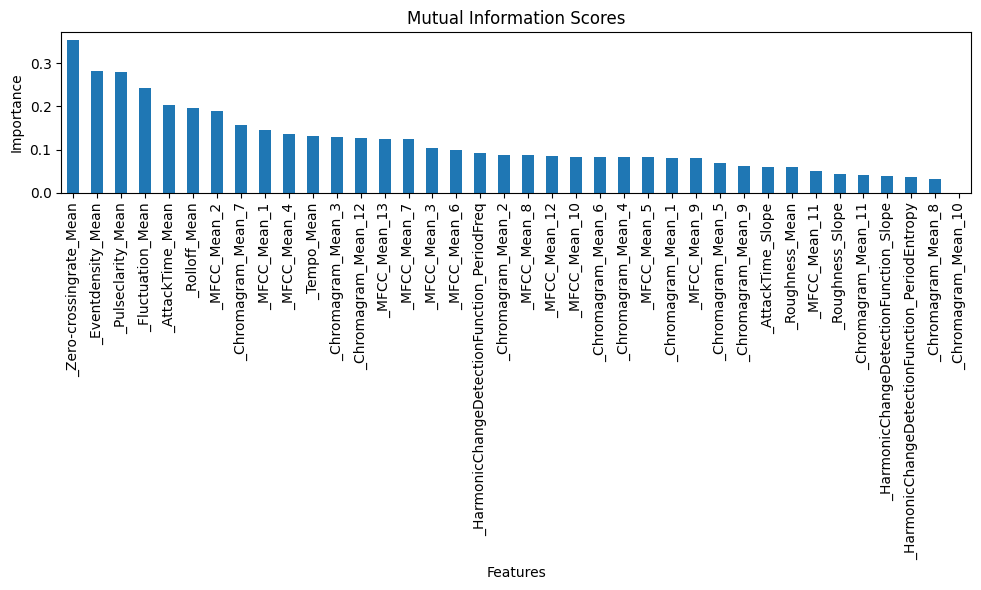

Top 20 features by random forest importance: ['_Zero-crossingrate_Mean', '_Fluctuation_Mean', '_Pulseclarity_Mean', '_Eventdensity_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_AttackTime_Mean', '_Roughness_Slope', '_Roughness_Mean', '_Rolloff_Mean', '_MFCC_Mean_7', '_MFCC_Mean_4', '_MFCC_Mean_3', '_Chromagram_Mean_7', '_Chromagram_Mean_6', '_Chromagram_Mean_3', '_MFCC_Mean_9', '_Chromagram_Mean_9', '_Chromagram_Mean_1', '_MFCC_Mean_6']


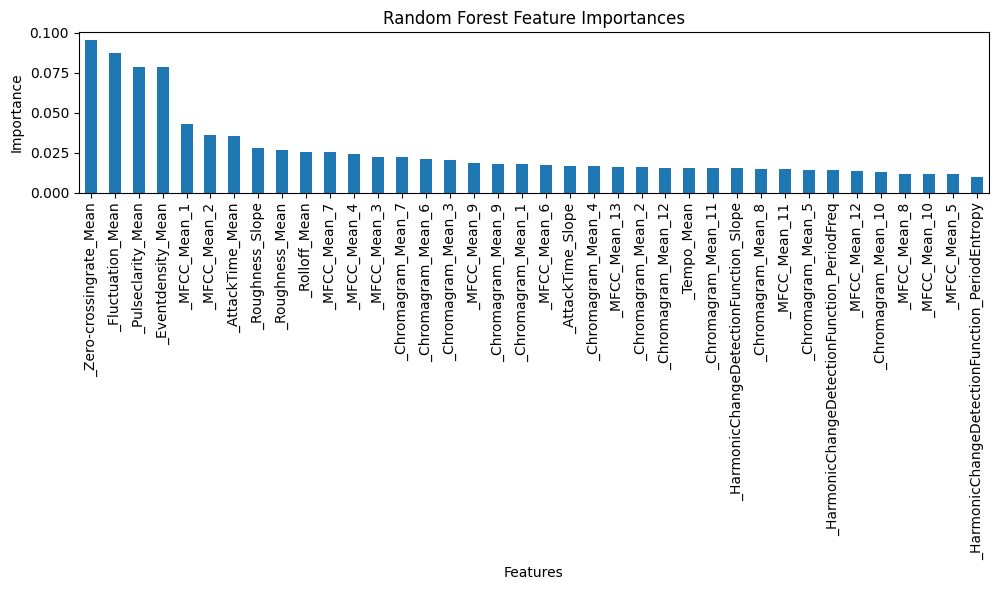

Number of features after combining MI and RF: 24
Feature selection completed. Selected features saved to 'feature_selected_data.csv'

Final selected features:
['_Tempo_Mean', '_Chromagram_Mean_9', '_MFCC_Mean_6', '_MFCC_Mean_9', '_Zero-crossingrate_Mean', '_Chromagram_Mean_6', '_Pulseclarity_Mean', '_MFCC_Mean_7', '_Chromagram_Mean_12', '_MFCC_Mean_3', '_Chromagram_Mean_3', '_Roughness_Slope', '_Chromagram_Mean_1', '_Chromagram_Mean_7', '_AttackTime_Mean', '_Eventdensity_Mean', '_Rolloff_Mean', '_Roughness_Mean', '_MFCC_Mean_4', '_MFCC_Mean_8', '_Fluctuation_Mean', '_MFCC_Mean_13', '_MFCC_Mean_1', '_MFCC_Mean_2']


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

def variance_threshold_selection(X, threshold=0.01):
    selector = VarianceThreshold(threshold)
    selector.fit(X)
    return X.columns[selector.get_support()].tolist()

def correlation_analysis(X, threshold=0.8):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return [col for col in X.columns if col not in to_drop]

def mutual_information_selection(X, y, n_features=20):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores.head(n_features).index.tolist()

def random_forest_importance(X, y, n_features=20):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    importances = pd.Series(rf.feature_importances_, index=X.columns)
    importances = importances.sort_values(ascending=False)
    return importances.head(n_features).index.tolist()

def plot_feature_importances(importances, title):
    plt.figure(figsize=(10, 6))
    importances.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

# Load your preprocessed data
df = pd.read_csv('fully_processed_data.csv')

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

print("Original number of features:", X.shape[1])

# 1. Variance Threshold
var_selected = variance_threshold_selection(X)
print("Features after variance threshold:", len(var_selected))

# 2. Correlation Analysis
corr_selected = correlation_analysis(X[var_selected])
print("Features after correlation analysis:", len(corr_selected))

# 3. Mutual Information
mi_selected = mutual_information_selection(X[corr_selected], y)
print("Top 20 features by mutual information:", mi_selected)

# Plot mutual information scores
mi_scores = mutual_info_classif(X[corr_selected], y)
mi_scores = pd.Series(mi_scores, index=X[corr_selected].columns).sort_values(ascending=False)
plot_feature_importances(mi_scores, 'Mutual Information Scores')

# 4. Random Forest Feature Importance
rf_selected = random_forest_importance(X[corr_selected], y)
print("Top 20 features by random forest importance:", rf_selected)

# Plot random forest feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X[corr_selected], y)
importances = pd.Series(rf.feature_importances_, index=X[corr_selected].columns).sort_values(ascending=False)
plot_feature_importances(importances, 'Random Forest Feature Importances')

# Combine selected features
combined_features = list(set(mi_selected + rf_selected))
print("Number of features after combining MI and RF:", len(combined_features))

# Create final dataset with selected features
final_df = df[combined_features + ['Class']]
final_df.to_csv('feature_selected_data.csv', index=False)

print("Feature selection completed. Selected features saved to 'feature_selected_data.csv'")

# Print final selected features
print("\nFinal selected features:")
print(combined_features)